In [1]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters t
@variables u(..)
Dₜ = Differential(t)
Dₜ² = Differential(t)^2

eq = Dₜ²(u(t))+Dₜ(u(t))~6u(t)
bcs = [
    u(0)~2,
    Dₜ(u(0))~-1
]

domain = [t∈0..2]
@named ode = PDESystem(eq, bcs, domain, [t], [u(t)])

PDESystem
Equations: Equation[Differential(t)(u(t)) + Differential(t)(Differential(t)(u(t))) ~ 6u(t)]
Boundary Conditions: Equation[u(0) ~ 2, Differential(t)(u(0)) ~ -1]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0..2)]
Dependent Variables: Num[u(t)]
Independent Variables: Num[t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [2]:
sampler = QuasiRandomSampler(1000, 1)
pinn = PINN(Siren(1,16,16,16,16,1; omega=1.0f0))
strategy = NonAdaptiveTraining(1, 50)

prob = Sophon.discretize(ode, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [0.6964869499206543; -0.5511996746063232; … ; -0.6775871515274048; 0.964974045753479;;], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.04419638589024544 0.5659594535827637 … -0.21709831058979034 -0.033189449459314346; 0.5235389471054077 -0.43671461939811707 … 0.16180935502052307 -0.5157831311225891; … ; -0.06792855262756348 -0.034215908497571945 … -0.37870916724205017 0.08685261011123657; -0.14252416789531708 0.27819928526878357 … 0.5468639731407166 -0.1414407640695572], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [0.16432379186153412 -0.6033838987350464 … 0.6083216071128845 -0.0017621585866436362; 0.2772686779499054 -0.14034932851791382 … -0.19077499210834503 0.4631214737892151; … ; 0.49410971999168396 -0.2876322567462921 … -0.14021632075309753 0.4967819154262543; 0.19366027414798737 0.526829183101654 … 0.362162321805954 -0.060238972306251526], bias = [0.0; 0.0; … ; 0.0; 0.0;

In [3]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 1618.0907730450188


Loss: 254.33300301103083


Loss: 82.25293993786224


Loss: 62.14295459358837


Loss: 54.14875806307767


Loss: 44.9064585882211


Loss: 41.82134517423199


Loss: 38.864355374188875
Loss: 36.31132527477902


Loss: 35.82169546711288
Loss: 35.78109312678044


Loss: 35.44523902854922
Loss: 35.26804086174116


Loss: 35.08199733886772
Loss: 34.88421376729105


Loss: 34.705664178351164
Loss: 34.62252479655921
Loss: 34.58039583220161


Loss: 34.37914929700474


Loss: 34.263796681489815
Loss: 34.18490661935264


Loss: 33.98182234636196


Loss: 33.597889062906944


Loss: 33.50706140370753


Loss: 33.150497373043464
Loss: 33.02554723795855


Loss: 32.934477426947645
Loss: 32.5850957458107


Loss: 32.42390974386136


Loss: 32.28861312054747


Loss: 32.130551890085684


Loss: 31.90512524464877


Loss: 31.86082859322745


Loss: 31.7927579026127


Loss: 31.618864080725913


Loss: 31.525773078270877


Loss: 31.424715412567533


Loss: 31.19873339341563


Loss: 31.066170044067746
Loss: 30.958908886185018


Loss: 30.81608143597702


Loss: 30.57409281786345


Loss: 30.13081325908937


Loss: 30.043502102587695


Loss: 29.754924627793198


Loss: 29.65656182945534


Loss: 29.154425324320723


Loss: 29.022096328076834


Loss: 28.52617244992703


Loss: 28.382165307517848


Loss: 28.24773205794174


Loss: 28.187251265233503


Loss: 28.077474058596383


Loss: 27.745294333170182


Loss: 26.788279968494233


Loss: 26.565074722766727


Loss: 26.383397571386478


Loss: 26.15172610914203


Loss: 25.67400517914361


Loss: 25.48658217368795


Loss: 25.323554210876082


Loss: 24.925830089997536


Loss: 24.852350604555028
Loss: 24.691655434563692


Loss: 24.528583352672076


Loss: 24.467216110960585


Loss: 24.178746895044277


Loss: 23.922739819296176


Loss: 23.80502985960722


Loss: 23.674486334602545


Loss: 23.435600687768883


Loss: 23.131335805493887


Loss: 22.967513484277557


Loss: 22.73751614363645


Loss: 22.637261695475598


Loss: 22.416562720874005


Loss: 21.958046617679898


Loss: 21.738583569442003


Loss: 21.48818280673094


Loss: 20.884470845179372


Loss: 20.578819497475983


Loss: 20.47853177380316


Loss: 20.09520711737898


Loss: 19.573915296178722


Loss: 19.451049769720342


Loss: 19.092341403174217


Loss: 18.589467577193727


Loss: 17.743228380574106


Loss: 17.331678367060533


Loss: 17.23504371510989


Loss: 17.11998521004879


Loss: 16.887413544497637


Loss: 16.55725562827451


Loss: 16.387256215418326


Loss: 16.280726368133003


Loss: 16.132288515616725


Loss: 15.461851257140296


Loss: 15.33037470467529


Loss: 15.030010564268235


Loss: 14.83858340040681


Loss: 14.714725237561105


Loss: 14.616674085352722


Loss: 13.923181518650283


Loss: 13.785852862149776


Loss: 13.631100045166063


Loss: 13.511910078670073


Loss: 13.281379434475822


Loss: 13.057994292481974


Loss: 12.932906610965144


Loss: 12.596252767747373


Loss: 12.43792039310497


Loss: 12.201930324697331


Loss: 12.011156932183521


Loss: 11.726211710199282


Loss: 11.492848749276781


Loss: 11.374240434823129


Loss: 10.890156616047577


Loss: 10.682330789282316


Loss: 10.504642789585974


Loss: 10.232230303765798


Loss: 9.925166419543705


Loss: 9.749932744518343


Loss: 9.497595879571628


Loss: 8.99783360201556


Loss: 8.902716251698127


Loss: 8.693993323804275


Loss: 8.51788912009529


Loss: 8.347156086943546
Loss: 8.236739519657608


Loss: 8.152808401066647
Loss: 8.052563766772613


Loss: 7.894498874405871


Loss: 7.6878029347859025


Loss: 7.3952121106852315


Loss: 7.0431590548825165


Loss: 6.904409418747859


Loss: 6.664574990961325


Loss: 6.52209242228043


Loss: 6.355458534399139


Loss: 6.100811040504667


Loss: 5.998469635535445


Loss: 5.80043557767168


Loss: 5.052099689474969


Loss: 4.822117129553252


Loss: 4.76987332229137


Loss: 4.6024310044020424


Loss: 4.513800278480737


Loss: 4.272890714113138


Loss: 4.155558552699652


Loss: 4.08291567037323


Loss: 4.015067382960887


Loss: 3.902239581281984


Loss: 3.818722125965245


Loss: 3.7282461207522357


Loss: 3.6654037608893386


Loss: 3.372467054562288


Loss: 3.2942048485281257


Loss: 3.253508580408564


Loss: 3.1374236350985774


Loss: 2.9225628185404715


Loss: 2.879291678510779


Loss: 2.8228210911698315


Loss: 2.743204514538746


Loss: 2.6721959486906273


Loss: 2.6272430078599047


Loss: 2.5683869331988576


Loss: 2.529725199623582


Loss: 2.493081346798256


Loss: 2.3156032975753793


Loss: 2.2442166304786895


Loss: 2.1980651977431034


Loss: 2.1402608909176677
Loss: 2.0648959270939544


Loss: 2.0159100715002296


Loss: 1.917290548834924


Loss: 1.8083867003549583


Loss: 1.7074148924219181


Loss: 1.6350226600324458


Loss: 1.5045597160585213


Loss: 1.450504556812598


Loss: 1.3760809377775494


Loss: 1.2569042173010045


Loss: 1.2335513058129826


Loss: 1.1978504932580958
Loss: 1.1620369889079025


Loss: 1.1258923105238372


Loss: 1.080288027907913
Loss: 1.074277465148033


Loss: 1.0137774056447748


Loss: 0.9750878418598402


Loss: 0.9519003662351313
Loss: 0.9258239961009369


Loss: 0.8756979054088608


Loss: 0.7653247943093843


Loss: 0.6895702768624887


Loss: 0.6402472893611652
Loss: 0.6296372039771687


Loss: 0.598138541357603
Loss: 0.5556752296352019


Loss: 0.50835043272121


Loss: 0.4533676647991167


Loss: 0.4234898017489941
Loss: 0.37449736304750136


Loss: 0.35802019719799894
Loss: 0.33961442701232886


Loss: 0.31457093833532895
Loss: 0.3020260808902762


Loss: 0.29732480827861907
Loss: 0.2899061047118818


Loss: 0.28366119155126135
Loss: 0.2759057242641376


Loss: 0.26195939350059194


Loss: 0.2259712781840078
Loss: 0.21601273775665197


Loss: 0.20483242096289186
Loss: 0.19592280130977016
Loss: 0.18947836514205904


Loss: 0.18303524056351705
Loss: 0.1773226071172626


Loss: 0.17066700422385486
Loss: 0.15562457324340212


Loss: 0.13910297491112977
Loss: 0.12774591541941877


Loss: 0.12774602583777933


Loss: 0.12015264986004061
Loss: 0.11009077332366127


Loss: 0.1026910229570988
Loss: 0.09533942849767793


Loss: 0.0838115126955823
Loss: 0.0770266182307875


Loss: 0.07082754233880041
Loss: 0.06014139028115198


Loss: 0.05406389013318139
Loss: 0.049220552336350296


Loss: 0.04355208816928339
Loss: 0.04002500633498656


Loss: 0.03409510495152703
Loss: 0.031206753581506357


Loss: 0.029710029975031832
Loss: 0.025503617025641374


Loss: 0.02378558161176677
Loss: 0.021279146905308702


Loss: 0.020194495221420722
Loss: 0.01905057175481795


Loss: 0.01777565465465441
Loss: 0.016598007558586418


Loss: 0.014933737050776955
Loss: 0.013283021644814789


Loss: 0.01195197025341229
Loss: 0.01025637208150301


Loss: 0.009407381260600175
Loss: 0.008052836858308047


Loss: 0.006874491242221775
Loss: 0.005925283355277132


Loss: 0.00559077192930842
Loss: 0.005160754103234383


Loss: 0.004707255332939255
Loss: 0.004637823758143042
Loss: 0.004262956914218166


Loss: 0.0037556464775677935
Loss: 0.003553068808079978


Loss: 0.0031965994103994428


Loss: 0.0029340389386957135
Loss: 0.002689769258460673


Loss: 0.0025647466577997133
Loss: 0.002431886024874432


Loss: 0.002373191214751052
Loss: 0.0021437792320972604


Loss: 0.0020461169164836842
Loss: 0.0018644388080122543


Loss: 0.0017433976338086371
Loss: 0.0017181348486440572
Loss: 0.0016350342206997394


Loss: 0.0015674435196246588
Loss: 0.0014694213499861417
Loss: 0.001406299393974135


Loss: 0.0013038011517372179
Loss: 0.0012367547243359125


Loss: 0.0011321194476324988
Loss: 0.0011062237585296678


Loss: 0.001019622451809448


Loss: 0.0009319803804162691
Loss: 0.0008616546657621538


Loss: 0.0008264051226242893
Loss: 0.0007756286412311719


Loss: 0.0007327819754085367
Loss: 0.0006723442288530143
Loss: 0.0006521615561083988


Loss: 0.000584712610280174
Loss: 0.0005237017850335105
Loss: 0.0004829251317394585


Loss: 0.000443436984784001
Loss: 0.0004105526916661325
Loss: 0.0003928597540636304


Loss: 0.0003651578082210207
Loss: 0.0003545811877829219
Loss: 0.00034647401163732434


Loss: 0.0003160642073351323
Loss: 0.0002973581824973299
Loss: 0.0002896417260491627


Loss: 0.0002864001437589534
Loss: 0.0002786859659138991
Loss: 0.0002648862965362601


Loss: 0.00025843942630555055
Loss: 0.0002503327263002505


Loss: 0.0002382580420261925
Loss: 0.00022731126419691048
Loss: 0.00022051912118297473


Loss: 0.0001722889540098795
Loss: 0.00016853464635039497


Loss: 0.00015083119425345933
Loss: 0.0001432480937224581
Loss: 0.0001376112704109259


Loss: 0.0001326834905728768
Loss: 0.0001293893689287285


Loss: 0.00011175313317385402
Loss: 0.00010543071621919662
Loss: 8.97715003388861e-5


Loss: 7.473519788617447e-5
Loss: 6.992777112643804e-5


Loss: 5.657038774131136e-5
Loss: 5.321569339505255e-5
Loss: 4.7649967832786066e-5


Loss: 4.262126696274038e-5
Loss: 3.7793100536058423e-5
Loss: 3.4612368138497686e-5


Loss: 3.2534214941560776e-5
Loss: 3.0933321472788734e-5
Loss: 3.0102473445052918e-5


Loss: 2.841863705053044e-5
Loss: 2.6792901557193497e-5
Loss: 2.544187322470298e-5


Loss: 2.158548581554454e-5
Loss: 2.054040169581522e-5
Loss: 1.9216000158824363e-5


Loss: 1.8448425493964047e-5
Loss: 1.7959254631589274e-5
Loss: 1.7812646457945018e-5


Loss: 1.7679429145701517e-5
Loss: 1.7439865376153024e-5
Loss: 1.7014475002039357e-5


Loss: 1.611902308374046e-5
Loss: 1.4547003268873184e-5
Loss: 1.3354016795879799e-5


Loss: 1.2687229630965929e-5
Loss: 1.2192456359865e-5
Loss: 1.1810716591577549e-5


Loss: 1.1121221344508093e-5
Loss: 1.0739401579066216e-5
Loss: 1.0546849503009458e-5


Loss: 9.966217055093472e-6
Loss: 9.624537247953248e-6
Loss: 9.560437492219792e-6


Loss: 9.25359278261432e-6
Loss: 9.13443216142119e-6
Loss: 8.985330742985633e-6


Loss: 8.88318815060965e-6
Loss: 8.812432829529533e-6
Loss: 8.747175544119042e-6


Loss: 8.699860406986773e-6
Loss: 8.663256979531067e-6
Loss: 8.627538173541683e-6


Loss: 8.545673719774398e-6
Loss: 8.459778057985353e-6
Loss: 8.404642453658977e-6


Loss: 8.333558478571829e-6
Loss: 8.20860504635834e-6


Loss: 7.730048671163497e-6
Loss: 7.141243787878501e-6
Loss: 6.839009738890836e-6


Loss: 6.190835740092962e-6
Loss: 5.7661341262461555e-6


Loss: 5.592080302558417e-6
Loss: 5.329507379783572e-6
Loss: 4.640393752842165e-6


Loss: 4.475471921940258e-6
Loss: 4.214802390589268e-6
Loss: 4.0376309383772146e-6


Loss: 3.8327993647194314e-6
Loss: 3.3681917589897044e-6
Loss: 2.9533654019542624e-6


Loss: 2.776603557808984e-6
Loss: 2.6129240035246987e-6
Loss: 2.420490004927229e-6


Loss: 2.3625696646027716e-6
Loss: 2.322029040579645e-6
Loss: 2.1873531683675017e-6


Loss: 2.1489288496223048e-6
Loss: 2.118053628397731e-6
Loss: 2.099517942240434e-6


Loss: 2.077104551413595e-6
Loss: 2.0681027904689516e-6
Loss: 2.059412078732176e-6


Loss: 2.0479480261084616e-6
Loss: 2.0338031741196804e-6
Loss: 2.0187892506691766e-6


Loss: 2.0154662877439133e-6
Loss: 2.014362794322001e-6
Loss: 2.011393686643631e-6


Loss: 2.008092914672239e-6
Loss: 2.00145402535522e-6


Loss: 1.991372814563225e-6
Loss: 1.9799273012911846e-6


Loss: 1.9685157099917405e-6
Loss: 1.959601208283292e-6


Loss: 1.9521672746184342e-6
Loss: 1.946303409342863e-6


Loss: 1.919573534354195e-6
Loss: 1.8952115096663208e-6


Loss: 1.8659931126861668e-6
Loss: 1.8196011890535705e-6
Loss: 1.7489574362029117e-6


Loss: 1.7215127928133282e-6
Loss: 1.6799027904466087e-6
Loss: 1.6338633470184817e-6


Loss: 1.6168944088679108e-6
Loss: 1.5502102471374586e-6
Loss: 1.530002712075252e-6


Loss: 1.5118977968192722e-6
Loss: 1.486915105777492e-6
Loss: 1.4664420568154792e-6


Loss: 1.4391041117931336e-6
Loss: 1.3843738791145231e-6
Loss: 1.3551801479556967e-6


Loss: 1.3128011707734757e-6
Loss: 1.2894617789435123e-6
Loss: 1.2588800218328273e-6


Loss: 1.2082706091371492e-6
Loss: 1.171049283362832e-6


Loss: 1.1369227867455545e-6
Loss: 1.1258546226547277e-6
Loss: 1.1125072291001515e-6


Loss: 1.083499375888223e-6
Loss: 1.0634128228965465e-6
Loss: 1.0493027078866064e-6


Loss: 1.0208480751018841e-6
Loss: 9.869205400710044e-7


Loss: 9.477922245436817e-7
Loss: 9.380281087368195e-7
Loss: 9.175826070073834e-7


Loss: 8.968687196721198e-7
Loss: 8.883660705292525e-7
Loss: 8.82158656190784e-7


Loss: 8.674986126714955e-7
Loss: 8.639897220000667e-7
Loss: 8.522547281961403e-7


Loss: 8.387426959268008e-7
Loss: 8.215867619955617e-7
Loss: 8.010852467557737e-7


Loss: 7.691823421896144e-7
Loss: 7.21102825035192e-7
Loss: 7.171339698107058e-7


Loss: 6.984522040287049e-7
Loss: 6.60323149043681e-7
Loss: 6.459056460654883e-7


Loss: 6.38550059515438e-7
Loss: 6.121309749279422e-7
Loss: 5.957524568395577e-7


Loss: 5.676641522943999e-7
Loss: 5.427008704744689e-7
Loss: 5.176601978234679e-7


Loss: 5.065164986927419e-7
Loss: 4.919101281517858e-7
Loss: 4.894825579956579e-7


Loss: 4.787673349324708e-7
Loss: 4.7189974434835824e-7
Loss: 4.562614934608257e-7


Loss: 4.4107932785905994e-7
Loss: 4.283125153148955e-7
Loss: 4.163052538501493e-7


Loss: 4.0998036752586376e-7
Loss: 4.0477292896167327e-7
Loss: 3.964133089210197e-7


Loss: 3.878911631372486e-7
Loss: 3.763155646631409e-7
Loss: 3.6336010554455616e-7


Loss: 3.596416273605368e-7
Loss: 3.5552830592527555e-7
Loss: 3.534083760465372e-7
Loss: 3.503028166132176e-7


Loss: 3.439147555246151e-7
Loss: 3.3844276597611916e-7
Loss: 3.3343298333969013e-7


Loss: 3.2388178756559835e-7
Loss: 3.1804722024587444e-7


Loss: 3.1348631769885683e-7


Loss: 3.101034105023135e-7
Loss: 3.062394209128751e-7


Loss: 3.021994421310303e-7
Loss: 2.9805970200012477e-7


Loss: 2.920072467904321e-7
Loss: 2.889738178111201e-7
Loss: 2.845204878757917e-7


Loss: 2.809469091591048e-7
Loss: 2.7606023408380417e-7
Loss: 2.741503613843905e-7


Loss: 2.70900762192057e-7
Loss: 2.678655839942987e-7
Loss: 2.659633214742802e-7


Loss: 2.6448142875327894e-7
Loss: 2.6375860900182807e-7
Loss: 2.627904572733541e-7


Loss: 2.620817019333932e-7
Loss: 2.6083831470820485e-7


Loss: 2.5972602707521737e-7
Loss: 2.5880258612258115e-7
Loss: 2.581751723760646e-7


Loss: 2.575403282473146e-7
Loss: 2.563102917320026e-7


Loss: 2.554079862265601e-7
Loss: 2.5511580890418815e-7


Loss: 2.549371948438062e-7
Loss: 2.54813124601218e-7
Loss: 2.5459554985929625e-7


Loss: 2.545760297161008e-7


Loss: 2.5456245386590693e-7
Loss: 2.5442940596767643e-7


Loss: 2.5301299830547257e-7
Loss: 2.5151275221723847e-7
Loss: 2.5092064400684533e-7


Loss: 2.5061637665425925e-7
Loss: 2.5020078438590995e-7
Loss: 2.50080888286823e-7


Loss: 2.498992397562022e-7
Loss: 2.497900424099859e-7


Loss: 2.497876242840551e-7
Loss: 2.497046701368411e-7


Loss: 2.493541203909392e-7
Loss: 2.4875316668878347e-7


Loss: 2.4707106405237824e-7
Loss: 2.463257251709065e-7
Loss: 2.45707210767481e-7


Loss: 2.453603767893026e-7


Loss: 2.453114729388673e-7
Loss: 2.4512931477049767e-7


Loss: 2.4494258082755157e-7
Loss: 2.4368693148293474e-7


Loss: 2.433639869697581e-7
Loss: 2.4266654412845704e-7


Loss: 2.4135461908334354e-7
Loss: 2.389086806191253e-7
Loss: 2.3558404057220634e-7


Loss: 2.3452111474334545e-7
Loss: 2.3373488935588101e-7
Loss: 2.3330132077257595e-7


Loss: 2.3286231726197172e-7
Loss: 2.3223777641681075e-7
Loss: 2.3025043547557936e-7


Loss: 2.2806142772415693e-7
Loss: 2.2578979785090811e-7
Loss: 2.2067738263981337e-7


Loss: 2.1837445842801317e-7
Loss: 2.1395767309122722e-7


Loss: 2.116676510925252e-7
Loss: 2.0549972633310915e-7
Loss: 2.0349331539511788e-7


Loss: 1.9921258121782518e-7
Loss: 1.9801775338932088e-7
Loss: 1.9064158210974007e-7


Loss: 1.8810925036497087e-7
Loss: 1.8578988070396568e-7
Loss: 1.7901034719248964e-7
Loss: 1.7775553396185453e-7


Loss: 1.7439980979886213e-7
Loss: 1.7210736398239883e-7
Loss: 1.6824038355170873e-7
Loss: 1.6439660105385705e-7


Loss: 1.623814040976135e-7
Loss: 1.562172588597242e-7
Loss: 1.5449853399414358e-7


Loss: 1.5185639351496814e-7
Loss: 1.4639684656870603e-7
Loss: 1.4373852282023214e-7


Loss: 1.3833235834349566e-7
Loss: 1.36584478913274e-7
Loss: 1.3470974277706952e-7


Loss: 1.3382316971609555e-7
Loss: 1.3302313449707506e-7
Loss: 1.3242021411853416e-7


Loss: 1.313510881878844e-7
Loss: 1.305511893206096e-7
Loss: 1.281426358147491e-7


Loss: 1.247437069567853e-7
Loss: 1.2303098744018443e-7
Loss: 1.194240822744692e-7


Loss: 1.1837641775119238e-7
Loss: 1.1456291215796253e-7
Loss: 1.125936141373746e-7
Loss: 1.0873399437135026e-7


Loss: 1.0622030351473907e-7
Loss: 1.0146836697780166e-7
Loss: 9.807580760869275e-8


Loss: 9.453235373441838e-8
Loss: 9.118132433730924e-8
Loss: 9.01621788201172e-8


Loss: 8.901381822141547e-8
Loss: 8.742762376920686e-8
Loss: 8.592571003066718e-8


Loss: 8.317694523729626e-8
Loss: 8.24426537773814e-8
Loss: 8.168652116295709e-8


Loss: 8.018339520695142e-8
Loss: 7.936722246507687e-8
Loss: 7.840598667801379e-8


Loss: 7.784204001835047e-8
Loss: 7.706169521144166e-8
Loss: 7.633110481685531e-8


Loss: 7.580462730533003e-8
Loss: 7.521243157166583e-8
Loss: 7.48473878620592e-8


Loss: 7.419826921935293e-8
Loss: 7.376673725083944e-8


Loss: 7.360156537634797e-8
Loss: 7.347345312403736e-8
Loss: 7.283362247304438e-8


Loss: 7.2693009584026e-8
Loss: 7.241858169989124e-8
Loss: 7.216133961203078e-8
Loss: 7.209889342491161e-8


Loss: 7.17476500217061e-8
Loss: 7.144375978571103e-8


Loss: 7.05648394797777e-8
Loss: 6.918572937431904e-8


Loss: 6.892373076939473e-8
Loss: 6.762163842185017e-8
Loss: 6.578159792604837e-8


Loss: 6.525058358088714e-8
Loss: 6.490520279911422e-8
Loss: 6.477268916419517e-8


Loss: 6.464201338651374e-8
Loss: 6.455802248122208e-8
Loss: 6.444896367658388e-8


Loss: 6.413660774098346e-8
Loss: 6.393689784723427e-8


Loss: 6.324396938253423e-8
Loss: 6.213406248899246e-8
Loss: 6.064795556485801e-8


Loss: 5.938819124746659e-8
Loss: 5.7928854783406554e-8
Loss: 5.67963841550134e-8


Loss: 5.554557238033773e-8
Loss: 5.421178559679083e-8
Loss: 5.3155499915729085e-8


Loss: 5.2347495106223114e-8
Loss: 5.1765840913069605e-8
Loss: 5.1333016420153335e-8


Loss: 5.0709151130430606e-8
Loss: 4.9506835865097075e-8


Loss: 4.835697109619519e-8
Loss: 4.785680416170296e-8
Loss: 4.7026465308688465e-8


Loss: 4.6421748592199e-8
Loss: 4.583613162345445e-8
Loss: 4.505601449659288e-8


Loss: 4.449664894991211e-8
Loss: 4.416189070193683e-8


Loss: 4.3855475642257915e-8
Loss: 4.3443054953596585e-8
Loss: 4.3059717113908874e-8


Loss: 4.28728291127881e-8
Loss: 4.2621849849250676e-8
Loss: 4.2456857970523474e-8


Loss: 4.2429918106504735e-8


Loss: 4.2424519163330643e-8


Loss: 4.242446872250819e-8


Loss: 4.2420520116069506e-8


Loss: 4.2420520116069506e-8


u: ComponentVector{Float64}(layer_1 = (weight = [-0.8070801481271199; 0.5698366890790556; … ; 0.5001955183552536; 0.34331667315935566;;], bias = [-0.1596982042522412; -1.4017392924802976; … ; 1.2397883100277405; 1.084103580674713;;]), layer_2 = (weight = [-0.030020945995432903 0.3095959193435948 … -0.04660998215221947 -0.20779280174065473; -0.05550143561010515 -0.4542057387141958 … 0.4974875582515483 -2.215523650668936; … ; 0.32505356632077914 0.059568922690185364 … -1.0215152341698461 -0.7571659987853037; -0.9331291315853874 0.9419096997887497 … 0.9198982173039721 -0.36088256631693005], bias = [-1.0126803768839434; -0.5443935136899364; … ; -0.3756006482344202; 0.6203221849716191;;]), layer_3 = (weight = [1.8284035603245272 -1.0016487541473276 … 0.08389508982068766 0.01799270673102648; 0.809910313161092 -1.3253334601074638 … -0.7559582801227062 1.2379180980279607; … ; -0.17821286941496225 -2.875572751503291 … 0.1748590401501401 1.022636947323299; -0.9944311603900935 0.9406267136565069 

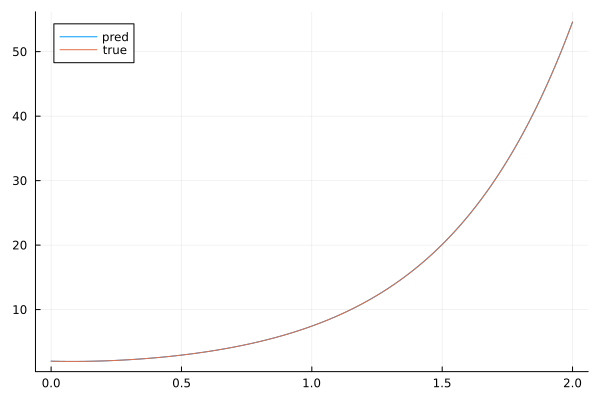

In [4]:
xs = reshape(range(0, 2, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. exp(2xs)+exp(-3xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")

## Train with Adam

In [5]:
using OptimizationOptimisers
res = Optimization.solve(prob, Adam(); maxiters=2000, callback=callback)

Loss: 1618.0907730450188


Loss: 1441.8117137868614
Loss: 1276.9822134044275
Loss: 1123.795051136553
Loss: 982.3795819961042
Loss: 852.7827372327239


Loss: 734.9661034171388
Loss: 628.8100989775322
Loss: 534.1194829159876
Loss: 450.62178774860024
Loss: 377.963358742442
Loss: 315.7076081724218
Loss: 263.3344076810089


Loss: 220.23900226105067
Loss: 185.73108693420014
Loss: 159.03491186776037
Loss: 139.29301485427808
Loss: 125.57470879498992
Loss: 116.89143088569794
Loss: 112.21977998212618
Loss: 110.53248951857564


Loss: 110.83581530362387
Loss: 112.2106345911287
Loss: 113.85288840645812
Loss: 115.10786826928214
Loss: 115.49304859800012
Loss: 114.70601901271269
Loss: 112.61696706661644


Loss: 109.2478937661498
Loss: 104.74253265996808
Loss: 99.33151851810354
Loss: 93.29695329021308
Loss: 86.93967247567704
Loss: 80.55142276573831
Loss: 74.39316026436006
Loss: 68.67993078079877


Loss: 63.57209899121468
Loss: 59.17230807328968
Loss: 55.52723968156449
Loss: 52.63314557238344
Loss: 50.444036374966515
Loss: 48.881472601983454
Loss: 47.84499367102087
Loss: 47.22235341045764
Loss: 46.898888120720656


Loss: 46.765511922851054
Loss: 46.72501120364856
Loss: 46.69647894666776
Loss: 46.617885547638686
Loss: 46.44691539530826
Loss: 46.1602988053583
Loss: 45.7519351265601
Loss: 45.23013423809735


Loss: 44.614307272529025
Loss: 43.93141640705373
Loss: 43.21246088368941
Loss: 42.48922799767947
Loss: 41.79149188694353
Loss: 41.14478795294517
Loss: 40.568841559385675
Loss: 40.07667672500735


Loss: 39.6743834246537
Loss: 39.36148048265441
Loss: 39.13177064741563
Loss: 38.97456135575328
Loss: 38.87610520635148
Loss: 38.82111169647839
Loss: 38.79419040989407
Loss: 38.78110668296488


Loss: 38.76976101089004
Loss: 38.75083964576195
Loss: 38.71812112507014
Loss: 38.668458629253145
Loss: 38.6014868204668
Loss: 38.51912169480633
Loss: 38.424933218907434
Loss: 38.32347003545544
Loss: 38.219608652949404


Loss: 38.11798629560562
Loss: 38.022556989187386
Loss: 37.936294324183194
Loss: 37.86104333227624
Loss: 37.79751112634054
Loss: 37.74537231461459
Loss: 37.70345953174978
Loss: 37.67000496490999


Loss: 37.6429006995215
Loss: 37.61994855038072
Loss: 37.59907728121463
Loss: 37.57851089144328
Loss: 37.556880396862
Loss: 37.533277289315784
Loss: 37.507253848399216
Loss: 37.47877890032173


Loss: 37.44816113930022
Loss: 37.415952693849945
Loss: 37.382846169122175
Loss: 37.349575724770084
Loss: 37.316831995912985
Loss: 37.28519638114336
Loss: 37.255098182209856
Loss: 37.226795050808995


Loss: 37.20037461343666
Loss: 37.17577363260301
Loss: 37.15280969185541
Loss: 37.1312198287834
Loss: 37.11070108974599
Loss: 37.090948361431096
Loss: 37.07168594109808
Loss: 37.052690213279234


Loss: 37.033803346330636
Loss: 37.01493712847741
Loss: 36.99606887838727
Loss: 36.977230852173044
Loss: 36.958495770741614
Loss: 36.93996016347751
Loss: 36.9217284892074
Loss: 36.903898700975404


Loss: 36.88655147043502
Loss: 36.86974299848933
Loss: 36.85350187733726
Loss: 36.83782961068867
Loss: 36.82270391264959
Loss: 36.808084192453045
Loss: 36.79391817783655


Loss: 36.780148496031536
Loss: 36.766719021272166
Loss: 36.75357956830858
Loss: 36.74068963773489
Loss: 36.728019853923286
Loss: 36.71555256028127
Loss: 36.70328058875005
Loss: 36.69120518857426


Loss: 36.67933366412637
Loss: 36.66767638551569
Loss: 36.65624420359681
Loss: 36.645046487453556
Loss: 36.63408939238615
Loss: 36.623374913128686
Loss: 36.61290086117128
Loss: 36.60266099338555


Loss: 36.592645862209004
Loss: 36.58284386848399
Loss: 36.57324229089294
Loss: 36.56382841338533
Loss: 36.55459044249937
Loss: 36.54551811033497
Loss: 36.53660299533055
Loss: 36.52783879271192


Loss: 36.51922095744107
Loss: 36.51074657692027
Loss: 36.50241370265925
Loss: 36.49422113722282
Loss: 36.48616782203449
Loss: 36.478252463904894
Loss: 36.47047336561544
Loss: 36.46282810271713
Loss: 36.45531367465638


Loss: 36.447926518406916
Loss: 36.44066252415063
Loss: 36.433517393471284
Loss: 36.426486729623505
Loss: 36.419566183152156
Loss: 36.41275177312402
Loss: 36.40603983700881
Loss: 36.3994270868238


Loss: 36.392910694007476
Loss: 36.38648819259515
Loss: 36.380157382139004
Loss: 36.37391630810234
Loss: 36.36776321170569
Loss: 36.36169628599782
Loss: 36.355713756951495
Loss: 36.349813828657275


Loss: 36.3439945608817
Loss: 36.33825404743771
Loss: 36.33259023535493
Loss: 36.3270011326642
Loss: 36.32148467081856
Loss: 36.316038877879656
Loss: 36.31066181188998
Loss: 36.30535173475746


Loss: 36.30010684142128
Loss: 36.294925552714155
Loss: 36.28980633911256
Loss: 36.2847477987858
Loss: 36.27974858207257
Loss: 36.274807400613454
Loss: 36.26992295807076
Loss: 36.26509402353129


Loss: 36.2603194324758
Loss: 36.25559797996584
Loss: 36.25092846361148
Loss: 36.24630977172589
Loss: 36.241740727095724
Loss: 36.23722019717143
Loss: 36.232747158159974
Loss: 36.22832051952386


Loss: 36.223939299608695
Loss: 36.219602551140426
Loss: 36.21530936531167
Loss: 36.21105885727997
Loss: 36.206850178484586
Loss: 36.20268255723892
Loss: 36.198555154987794
Loss: 36.19446725159476


Loss: 36.19041813193352
Loss: 36.186407055491976
Loss: 36.182433375182924
Loss: 36.17849638512145
Loss: 36.17459541368083
Loss: 36.1707298452063
Loss: 36.1668990470001
Loss: 36.16310244436593


Loss: 36.159339406941015
Loss: 36.15560941955153
Loss: 36.15191188636979
Loss: 36.148246340310294
Loss: 36.14461221792302
Loss: 36.14100906854911
Loss: 36.13743636339867
Loss: 36.133893688534435


Loss: 36.130380564652945
Loss: 36.12689660018781
Loss: 36.12344129735751
Loss: 36.1200143042484
Loss: 36.11661515809794
Loss: 36.11324352952634
Loss: 36.109899001112616
Loss: 36.10658118686634


Loss: 36.10328979029335
Loss: 36.100024407987725
Loss: 36.09678466101331
Loss: 36.09357030386818
Loss: 36.09038100371275
Loss: 36.087216390389315
Loss: 36.084076215586954
Loss: 36.08096016148588


Loss: 36.0778679670349
Loss: 36.07479931688135
Loss: 36.07175396692028
Loss: 36.068731587353334
Loss: 36.06573201169275
Loss: 36.06275493984595
Loss: 36.05980012289921
Loss: 36.05686731415083


Loss: 36.053956291936984
Loss: 36.05106680698718
Loss: 36.04819864620173
Loss: 36.04535159691223
Loss: 36.04252543433557
Loss: 36.039719922889255
Loss: 36.036934919359965
Loss: 36.0341701578122


Loss: 36.031425477168085
Loss: 36.02870066883225
Loss: 36.02599553634215
Loss: 36.02330991237452
Loss: 36.02064358662962
Loss: 36.01799644201843
Loss: 36.015368180464264
Loss: 36.01275874851282


Loss: 36.010167910624965
Loss: 36.00759556978438
Loss: 36.00504147285537
Loss: 36.00250549915927
Loss: 35.999987493182076
Loss: 35.997487297823476
Loss: 35.99500475122208
Loss: 35.9925397161665


Loss: 35.99009203558446
Loss: 35.98766155992516
Loss: 35.985248155119734
Loss: 35.98285166213836
Loss: 35.98047196639045
Loss: 35.97810889093207
Loss: 35.97576232715979
Loss: 35.97343214746294


Loss: 35.97111817947836
Loss: 35.968820359827994
Loss: 35.966538483194924
Loss: 35.96427248890778
Loss: 35.96202221253185
Loss: 35.95978750694607


Loss: 35.95756829375027
Loss: 35.9553644505981
Loss: 35.95317581651107
Loss: 35.951002296826665
Loss: 35.94884380472938
Loss: 35.94670016863221
Loss: 35.94457131778456


Loss: 35.942457079468575
Loss: 35.94035738999345
Loss: 35.93827217287386
Loss: 35.936201202413066
Loss: 35.93414446966372
Loss: 35.93210182544583
Loss: 35.93007319254733
Loss: 35.928058409825624


Loss: 35.92605743069852
Loss: 35.92407011406511
Loss: 35.92209636817531
Loss: 35.92013609460627
Loss: 35.918189133245576
Loss: 35.9162554762037
Loss: 35.914334977890626


Loss: 35.91242754996012
Loss: 35.91053310411366
Loss: 35.90865152153344
Loss: 35.90678264770124
Loss: 35.9049264712953
Loss: 35.90308290949188
Loss: 35.90125181155058
Loss: 35.89943310679371


Loss: 35.89762670976952
Loss: 35.89583250556121
Loss: 35.894050384413546
Loss: 35.89228033823886
Loss: 35.890522219697004
Loss: 35.88877592204682
Loss: 35.88704137505963
Loss: 35.88531852095318


Loss: 35.883607201597826
Loss: 35.881907398914244
Loss: 35.880219004101455
Loss: 35.878541932501236
Loss: 35.876876085333926
Loss: 35.87522137874279
Loss: 35.873577760503736
Loss: 35.871945103531445
Loss: 35.8703233646924


Loss: 35.86871244906164
Loss: 35.86711226046496
Loss: 35.86552271550409
Loss: 35.863943761308526
Loss: 35.862375300308145
Loss: 35.860817248080444
Loss: 35.859269542851195
Loss: 35.857732110852


Loss: 35.85620484101244
Loss: 35.854687659451415
Loss: 35.853180554405625
Loss: 35.85168339350578
Loss: 35.85019609367894
Loss: 35.84871858581276
Loss: 35.84725082885993
Loss: 35.84579272028676


Loss: 35.844344202884564
Loss: 35.84290519006518
Loss: 35.84147560587062
Loss: 35.84005539507789
Loss: 35.8386444664906
Loss: 35.8372428079312
Loss: 35.83585024748288
Loss: 35.83446678606763


Loss: 35.83309231633966
Loss: 35.831726831718655
Loss: 35.830370187701114
Loss: 35.82902237398656
Loss: 35.827683319301364
Loss: 35.82635293017605
Loss: 35.82503112232073
Loss: 35.82371789673646
Loss: 35.8224131081331


Loss: 35.821116747319316
Loss: 35.81982872491036
Loss: 35.81854900128603
Loss: 35.81727745281459
Loss: 35.81601413363521
Loss: 35.814758837472745
Loss: 35.81351161674355
Loss: 35.812272358887675


Loss: 35.811041006569354
Loss: 35.80981747552199
Loss: 35.80860175159219
Loss: 35.80739374477264
Loss: 35.80619340635812
Loss: 35.8050006739241
Loss: 35.80381547183884
Loss: 35.80263777147636


Loss: 35.80146749580781
Loss: 35.80030458157354
Loss: 35.79914901359435
Loss: 35.798000675067506
Loss: 35.79685954087648
Loss: 35.795725552817586
Loss: 35.79459865690594
Loss: 35.7934788111872


Loss: 35.792365888898544
Loss: 35.791259930878404
Loss: 35.79016085062136
Loss: 35.78906857416612
Loss: 35.78798304151895
Loss: 35.78690422846655
Loss: 35.78583209348209
Loss: 35.78476654425449
Loss: 35.7837075357583


Loss: 35.782655061830646
Loss: 35.781609003680686
Loss: 35.78056934605498
Loss: 35.77953604817562
Loss: 35.77850903532107
Loss: 35.77748830273808
Loss: 35.776473724899
Loss: 35.77546532680773


Loss: 35.77446302640081
Loss: 35.77346675941983
Loss: 35.77247654122137
Loss: 35.77149224604371
Loss: 35.77051384907867
Loss: 35.76954131540111
Loss: 35.76857460206613
Loss: 35.76761365572791


Loss: 35.76665845147507
Loss: 35.765708931775094
Loss: 35.76476500154653
Loss: 35.76382669231011
Loss: 35.76289390327683
Loss: 35.76196663726312
Loss: 35.76104481498126
Loss: 35.76012839090523


Loss: 35.75921736677233
Loss: 35.75831164528829
Loss: 35.75741118800588
Loss: 35.75651599540404
Loss: 35.75562600211864
Loss: 35.754741132737074
Loss: 35.75386140172774
Loss: 35.75298674830828
Loss: 35.75211709450198


Loss: 35.75125246417542
Loss: 35.750392773924084
Loss: 35.74953799066485
Loss: 35.7486880848143
Loss: 35.747843002348645
Loss: 35.74700270746419
Loss: 35.74616718375044
Loss: 35.745336359328704


Loss: 35.74451019758129
Loss: 35.74368870628538
Loss: 35.74287181311188
Loss: 35.742059441584786
Loss: 35.74125164446751
Loss: 35.7404483132876
Loss: 35.739649435724516
Loss: 35.73885500120634


Loss: 35.738064915133165
Loss: 35.73727917016783
Loss: 35.736497743365966
Loss: 35.73572057600372
Loss: 35.73494765078206
Loss: 35.73417895754842
Loss: 35.733414392586276
Loss: 35.732653990754606


Loss: 35.73189767740242
Loss: 35.731145451027444
Loss: 35.73039722308435
Loss: 35.72965300777902
Loss: 35.72891278676787
Loss: 35.72817645458145
Loss: 35.72744403719448
Loss: 35.72671550692736
Loss: 35.72599081071246


Loss: 35.72526990968549
Loss: 35.724552778502286
Loss: 35.72383938618822
Loss: 35.72312972750525
Loss: 35.72242371065717
Loss: 35.72172137559071
Loss: 35.72102264785766
Loss: 35.72032752439706
Loss: 35.71963595121916


Loss: 35.71894789751577
Loss: 35.71826335541584
Loss: 35.71758230070854
Loss: 35.71690461911855
Loss: 35.71623041521003
Loss: 35.71555956679717
Loss: 35.7148921022264
Loss: 35.71422792409515


Loss: 35.713567076636714
Loss: 35.71290948467604
Loss: 35.7122551712334
Loss: 35.711604016764014
Loss: 35.71095608192012
Loss: 35.71031131280609
Loss: 35.709669662948464
Loss: 35.70903112687737


Loss: 35.70839570096135
Loss: 35.707763316928585
Loss: 35.70713395526066
Loss: 35.70650759177017
Loss: 35.705884198736875
Loss: 35.70526378540684
Loss: 35.704646299296925


Loss: 35.70403171721948
Loss: 35.7034200029035
Loss: 35.70281112724308
Loss: 35.702205103353315
Loss: 35.701601883764724
Loss: 35.70100142361101
Loss: 35.70040376928548


Loss: 35.69980879235016
Loss: 35.69921657034645
Loss: 35.69862703697985
Loss: 35.69804011737837
Loss: 35.69745586147666
Loss: 35.696874276686
Loss: 35.69629523535944


Loss: 35.69571876299897
Loss: 35.695144852996854
Loss: 35.69457347995469
Loss: 35.69400458015536
Loss: 35.69343820571252
Loss: 35.69287426404138
Loss: 35.69231280113693


Loss: 35.69175373870364
Loss: 35.69119705427223
Loss: 35.690642777865285
Loss: 35.69009086053894
Loss: 35.689541254587965
Loss: 35.688993978219656
Loss: 35.68844900551895


Loss: 35.68790631746632
Loss: 35.68736584771289
Loss: 35.686827637258595
Loss: 35.686291620166806
Loss: 35.68575785987452
Loss: 35.68522622170501
Loss: 35.68469677306364


Loss: 35.684169452574196
Loss: 35.68364423832442
Loss: 35.68312115347214
Loss: 35.68260010730251
Loss: 35.6820811471046
Loss: 35.6815642539797
Loss: 35.68104937590716


Loss: 35.68053651531574
Loss: 35.680025641112685
Loss: 35.679516729896704
Loss: 35.67900977567309
Loss: 35.678504760872876
Loss: 35.67800170347641
Loss: 35.67750049346842
Loss: 35.67700122270703


Loss: 35.676503775629115
Loss: 35.676008192746075
Loss: 35.6755144561218
Loss: 35.67502257213915
Loss: 35.67453243205332
Loss: 35.67404412885539


Loss: 35.67355757713123
Loss: 35.673072756012864
Loss: 35.67258969467283
Loss: 35.67210835522656
Loss: 35.671628724520176
Loss: 35.67115079527696
Loss: 35.67067452367513


Loss: 35.67019994670285
Loss: 35.669726971749604
Loss: 35.66925565984664
Loss: 35.6687859278745
Loss: 35.66831783045562
Loss: 35.66785133431764
Loss: 35.6673863455634
Loss: 35.66692297898822


Loss: 35.666461129192115
Loss: 35.66600082146226
Loss: 35.66554200900982
Loss: 35.66508468874454
Loss: 35.66462886801548
Loss: 35.66417454647697
Loss: 35.663721621972456
Loss: 35.66327018042521


Loss: 35.66282019721736
Loss: 35.66237157821751
Loss: 35.66192441270496
Loss: 35.66147858813539
Loss: 35.66103418343787
Loss: 35.66059112630294
Loss: 35.66014942747522
Loss: 35.65970906349411


Loss: 35.659270062687014
Loss: 35.658832328058416
Loss: 35.65839592768701
Loss: 35.657960782509136
Loss: 35.65752694630372
Loss: 35.657094346854294
Loss: 35.65666305843827
Loss: 35.65623296239787


Loss: 35.655804099339626
Loss: 35.655376473329135
Loss: 35.65495003039552
Loss: 35.65452481435847
Loss: 35.65410077356729
Loss: 35.653677888286396
Loss: 35.65325617925416


Loss: 35.65283560135854
Loss: 35.65241617103141
Loss: 35.65199787624851
Loss: 35.651580707253316
Loss: 35.651164639152555
Loss: 35.65074965121427
Loss: 35.6503357575607


Loss: 35.649922929111305
Loss: 35.64951116990447
Loss: 35.649100482526805
Loss: 35.648690790017184
Loss: 35.64828215281574
Loss: 35.64787457336401
Loss: 35.6474679526856


Loss: 35.64706238184989
Loss: 35.64665776152255
Loss: 35.64625416005893
Loss: 35.64585151037625
Loss: 35.64544983988146
Loss: 35.64504912333395
Loss: 35.64464934046826
Loss: 35.64425047287217


Loss: 35.6438525415869
Loss: 35.643455549981844
Loss: 35.643059444757974
Loss: 35.64266423166322
Loss: 35.64226994799616
Loss: 35.6418764900796
Loss: 35.64148394941906
Loss: 35.64109222405468


Loss: 35.64070139576157
Loss: 35.640311396419804
Loss: 35.639922211761984
Loss: 35.63953391040956
Loss: 35.63914638181428
Loss: 35.63875969771627
Loss: 35.63837374526997
Loss: 35.637988641799325


Loss: 35.63760434020791
Loss: 35.63722081315995
Loss: 35.63683802901187
Loss: 35.636456000145685
Loss: 35.63607477394812
Loss: 35.63569425570267
Loss: 35.635314471507996
Loss: 35.634935418268526
Loss: 35.63455711647945


Loss: 35.634179509978296
Loss: 35.63380264376161
Loss: 35.633426430108834
Loss: 35.63305094072605
Loss: 35.63267613455443
Loss: 35.63230200492043
Loss: 35.631928547843195
Loss: 35.631555740360525
Loss: 35.63118361762818


Loss: 35.630812160610326
Loss: 35.630441281316756
Loss: 35.630071087100895
Loss: 35.62970151592678
Loss: 35.6293325726003
Loss: 35.62896423913243
Loss: 35.62859650246939
Loss: 35.62822940313602


Loss: 35.627862870662135
Loss: 35.62749693745032
Loss: 35.62713159619727
Loss: 35.62676682222061
Loss: 35.62640261704352
Loss: 35.62603900535727
Loss: 35.62567590325721
Loss: 35.625313392341916


Loss: 35.624951428405225
Loss: 35.62458998844188
Loss: 35.62422909496774
Loss: 35.62386875075117
Loss: 35.62350891191585
Loss: 35.623149572897866
Loss: 35.62279076263181
Loss: 35.62243244060662


Loss: 35.622074585762206
Loss: 35.62171729793222
Loss: 35.62136047905734
Loss: 35.62100414916995
Loss: 35.6206482647602
Loss: 35.62029286637634
Loss: 35.61993794940628
Loss: 35.61958349511179


Loss: 35.6192294569529
Loss: 35.61887590176907
Loss: 35.618522812474914
Loss: 35.618170146584795
Loss: 35.617817878542475
Loss: 35.617466096061776
Loss: 35.61711473127575
Loss: 35.616763759430924


Loss: 35.616413236225945
Loss: 35.61606309344856
Loss: 35.61571335228548
Loss: 35.61536405454621
Loss: 35.61501513206696
Loss: 35.61466659470951


Loss: 35.61431843518505
Loss: 35.61397070815442
Loss: 35.613623296576485
Loss: 35.61327628090532
Loss: 35.612929654045
Loss: 35.61258337980805
Loss: 35.61223747331743
Loss: 35.611891895128565


Loss: 35.61154670310291
Loss: 35.61120184336524
Loss: 35.610857305854914
Loss: 35.61051314835754
Loss: 35.61016931556036
Loss: 35.60982577638155
Loss: 35.6094825834223
Loss: 35.60913971697982
Loss: 35.60879714947599


Loss: 35.60845493398857
Loss: 35.60811300494118
Loss: 35.607771409995706
Loss: 35.60743011104039
Loss: 35.60708908516261
Loss: 35.60674838131873
Loss: 35.60640791848223
Loss: 35.60606778308707
Loss: 35.60572791469072


Loss: 35.60538837335011
Loss: 35.60504908566831
Loss: 35.604710035170854
Loss: 35.60437127540211
Loss: 35.604032801582235
Loss: 35.60369457633412
Loss: 35.60335658046039
Loss: 35.603018865672915


Loss: 35.60268141319518
Loss: 35.60234418035095
Loss: 35.60200724165448
Loss: 35.60167049518771
Loss: 35.60133399767177
Loss: 35.60099775219656
Loss: 35.60066173032831
Loss: 35.600325923531315


Loss: 35.599990361761755
Loss: 35.59965503974578
Loss: 35.59931989457802
Loss: 35.598984989035486
Loss: 35.59865029767468
Loss: 35.59831579990621
Loss: 35.597981511605624
Loss: 35.597647451299274


Loss: 35.59731357359913
Loss: 35.596979893473666
Loss: 35.59664641368878
Loss: 35.596313140927904
Loss: 35.595980045675205
Loss: 35.59564712842206


Loss: 35.595314422687835
Loss: 35.594981861504884
Loss: 35.59464949628213
Loss: 35.594317320406056
Loss: 35.593985300844025
Loss: 35.59365346503695
Loss: 35.593321798959984


Loss: 35.59299029636307
Loss: 35.59265893167998
Loss: 35.592327763432934
Loss: 35.59199673819929
Loss: 35.59166585472826
Loss: 35.59133514135344
Loss: 35.59100457269059


Loss: 35.590674162267646
Loss: 35.59034390820329
Loss: 35.59001374849249
Loss: 35.58968376706139
Loss: 35.589353934068185
Loss: 35.58902420900144
Loss: 35.58869463930376
Loss: 35.58836519570624


Loss: 35.58803587583692
Loss: 35.58770670653421
Loss: 35.58737762729252
Loss: 35.587048668611494
Loss: 35.586719849371555
Loss: 35.58639116547549
Loss: 35.58606257931531
Loss: 35.58573407924085


Loss: 35.58540573832209
Loss: 35.585077504139456
Loss: 35.5847493819945
Loss: 35.58442132887171
Loss: 35.584093391908134
Loss: 35.58376556037669
Loss: 35.58343784139139
Loss: 35.583110220861464


Loss: 35.58278268623139
Loss: 35.5824552544146
Loss: 35.58212789889457
Loss: 35.58180064766256
Loss: 35.58147347667254
Loss: 35.58114639399094
Loss: 35.580819404002774
Loss: 35.58049250375575


Loss: 35.5801656820682
Loss: 35.57983894256836
Loss: 35.579512258591414
Loss: 35.579185672397976
Loss: 35.57885912962958
Loss: 35.578532702533884
Loss: 35.5782063221322
Loss: 35.57788000631341


Loss: 35.57755375956203
Loss: 35.57722760484326
Loss: 35.57690149856488
Loss: 35.57657545124943
Loss: 35.57624947677594
Loss: 35.57592355192825
Loss: 35.57559765031733
Loss: 35.57527185943708


Loss: 35.57494610450857
Loss: 35.574620413785574
Loss: 35.57429475640552
Loss: 35.57396914335861
Loss: 35.57364359363111
Loss: 35.57331811267935
Loss: 35.57299266689042
Loss: 35.57266723403067


Loss: 35.57234186611137
Loss: 35.57201656018349
Loss: 35.5716912338423
Loss: 35.5713659953642
Loss: 35.57104079296591
Loss: 35.57071564373968
Loss: 35.57039050082929
Loss: 35.570065362633855


Loss: 35.56974027579297
Loss: 35.56941527253154
Loss: 35.56909023968644
Loss: 35.56876524997056
Loss: 35.56844030175073
Loss: 35.56811535635178
Loss: 35.56779046024127
Loss: 35.56746556061854


Loss: 35.567140659721005
Loss: 35.56681583717271
Loss: 35.566491052884345
Loss: 35.56616620471693
Loss: 35.565841440093415
Loss: 35.565516653609876
Loss: 35.565191910758685
Loss: 35.56486714063241


Loss: 35.56454240365981
Loss: 35.56421771197761
Loss: 35.563892986366476
Loss: 35.56356827918536
Loss: 35.56324358531701
Loss: 35.56291887432239
Loss: 35.56259419422249
Loss: 35.56226950939318


Loss: 35.56194485610842
Loss: 35.56162016781373
Loss: 35.561295513849764
Loss: 35.56097082390554
Loss: 35.56064611935089
Loss: 35.560321482037416
Loss: 35.559996781789934


Loss: 35.559672111259104
Loss: 35.55934740697114
Loss: 35.559022701088715
Loss: 35.55869800449013
Loss: 35.558373298402046
Loss: 35.55804857297465
Loss: 35.55772383104431
Loss: 35.55739911162915


Loss: 35.55707437232287
Loss: 35.556749584475554
Loss: 35.55642480954542
Loss: 35.556100009924336
Loss: 35.55577518562402
Loss: 35.55545035490667
Loss: 35.555125514900524
Loss: 35.554800660586054


Loss: 35.55447576524153
Loss: 35.55415083743439
Loss: 35.553825939078855
Loss: 35.55350098037343
Loss: 35.55317602223025
Loss: 35.55285101959001
Loss: 35.55252598478545


Loss: 35.55220093630289
Loss: 35.55187586906305
Loss: 35.55155077737697
Loss: 35.55122564621156
Loss: 35.550900469111056
Loss: 35.550575266140086
Loss: 35.55025005648647


Loss: 35.54992481685044
Loss: 35.54959952000039
Loss: 35.54927419151495
Loss: 35.54894884129852
Loss: 35.54862344752883
Loss: 35.5482980468356
Loss: 35.547972600354306
Loss: 35.547647065474536


Loss: 35.54732152983846
Loss: 35.54699594010594
Loss: 35.54667033552619
Loss: 35.54634468883277
Loss: 35.54601899062241
Loss: 35.54569325828724
Loss: 35.54536744595432
Loss: 35.54504164081373


Loss: 35.54471578093696
Loss: 35.54438985021707
Loss: 35.54406389250177
Loss: 35.54373786988452
Loss: 35.54341181677209
Loss: 35.543085709499984
Loss: 35.542759551193015
Loss: 35.54243334306602


Loss: 35.54210710112566
Loss: 35.54178077624587
Loss: 35.541454418563525
Loss: 35.541128018439785
Loss: 35.54080154431446
Loss: 35.54047501481308
Loss: 35.540148465115784
Loss: 35.53982181779155


Loss: 35.53949515196584
Loss: 35.5391684129956
Loss: 35.53884160711254
Loss: 35.53851473566591
Loss: 35.53818780690811
Loss: 35.537860830267405
Loss: 35.537533807818996
Loss: 35.53720670498171


Loss: 35.53687954169405
Loss: 35.5365523255564
Loss: 35.53622503573349
Loss: 35.535897655179596
Loss: 35.53557026453328
Loss: 35.535242780235826
Loss: 35.53491523399539
Loss: 35.53458760748589


Loss: 35.53425995285758
Loss: 35.533932176262255
Loss: 35.53360436969917
Loss: 35.53327649869515
Loss: 35.532948527902676
Loss: 35.53262050075633
Loss: 35.53229239487923
Loss: 35.53196421482506


Loss: 35.53163597586047
Loss: 35.5313076679755
Loss: 35.53097928854519
Loss: 35.53065080696853
Loss: 35.53032226957043
Loss: 35.52999362477591
Loss: 35.52966494409161
Loss: 35.52933617352093


Loss: 35.52900732448204
Loss: 35.52867838062347
Loss: 35.528349398134964
Loss: 35.52802028696553
Loss: 35.527691108482095
Loss: 35.527361869101725
Loss: 35.527032541214396
Loss: 35.526703109423295


Loss: 35.52637360948065
Loss: 35.52604401026917
Loss: 35.52571434771826
Loss: 35.52538462554561
Loss: 35.52505477832465
Loss: 35.52472485195935
Loss: 35.524394838105536
Loss: 35.52406473295421


Loss: 35.52373454654468
Loss: 35.52340425710443
Loss: 35.52307387348125
Loss: 35.52274341898293
Loss: 35.52241285759353
Loss: 35.522082220961586
Loss: 35.5217515009858
Loss: 35.52142065975576


Loss: 35.52108972381446
Loss: 35.52075871795314
Loss: 35.520427620252434
Loss: 35.52009639423183
Loss: 35.51976507308289
Loss: 35.51943368930988
Loss: 35.51910218918772
Loss: 35.51877057165162


Loss: 35.518438872699384
Loss: 35.518107082145455
Loss: 35.51777519816637
Loss: 35.51744317689255
Loss: 35.51711108458994
Loss: 35.51677885601498
Loss: 35.51644658422575
Loss: 35.51611415592773


Loss: 35.51578162559704
Loss: 35.51544903216089
Loss: 35.515116286667464
Loss: 35.514783440918066
Loss: 35.51445051843358
Loss: 35.51411746364851
Loss: 35.51378428957224
Loss: 35.51345103779993
Loss: 35.51311765084444


Loss: 35.512784151494394
Loss: 35.512450573131574
Loss: 35.512116845366386
Loss: 35.51178300151916
Loss: 35.51144907771162
Loss: 35.51111501511995
Loss: 35.51078086371218
Loss: 35.51044658108471


Loss: 35.51011217218942
Loss: 35.50977764589995
Loss: 35.509443007549656
Loss: 35.50910827272327
Loss: 35.508773368588166
Loss: 35.50843840270234
Loss: 35.508103274681964
Loss: 35.50776807092022
Loss: 35.50743267904436


Loss: 35.50709720571357
Loss: 35.506761610009015
Loss: 35.5064258681008
Loss: 35.50609004064783
Loss: 35.50575405859063
Loss: 35.50541795436414
Loss: 35.50508171209708
Loss: 35.5047453644271


Loss: 35.504408857281575
Loss: 35.504072243042046
Loss: 35.503735495816144
Loss: 35.50339862739073
Loss: 35.503061622563806
Loss: 35.50272445784157
Loss: 35.50238721479971
Loss: 35.50204978283554
Loss: 35.50171224111778


Loss: 35.501374575623906
Loss: 35.50103678000388
Loss: 35.50069879914232
Loss: 35.50036071417811
Loss: 35.500022495054054
Loss: 35.49968412160606
Loss: 35.499345622082565
Loss: 35.49900696966105


Loss: 35.49866817471941
Loss: 35.4983292571964
Loss: 35.49799018744365
Loss: 35.49765096084147
Loss: 35.4973115953626
Loss: 35.496972094272884
Loss: 35.4966324488303
Loss: 35.49629266665276


Loss: 35.49595270910844
Loss: 35.49561261736432
Loss: 35.49527235347485
Loss: 35.494931952674044
Loss: 35.49459142698353
Loss: 35.494250730002264
Loss: 35.493909865457816
Loss: 35.4935688755761


Loss: 35.493227712546
Loss: 35.492886380045434
Loss: 35.492544907702765
Loss: 35.49220329355204
Loss: 35.49186151131426
Loss: 35.491519533458494
Loss: 35.49117744786863
Loss: 35.49083518249553


Loss: 35.49049276229654
Loss: 35.49015018022116
Loss: 35.48980742949706
Loss: 35.4894645230739
Loss: 35.48912144618737
Loss: 35.48877820178107
Loss: 35.48843481293741
Loss: 35.48809122336023


Loss: 35.487747463469
Loss: 35.487403554710426
Loss: 35.48705948249465
Loss: 35.48671522192625
Loss: 35.486370828249285
Loss: 35.4860262111879
Loss: 35.485681441401105
Loss: 35.48533647948798


Loss: 35.48499137547496
Loss: 35.48464607836824
Loss: 35.484300593470664
Loss: 35.483954971101184
Loss: 35.48360912484391
Loss: 35.483263115593026
Loss: 35.48291692337976


Loss: 35.482570567749924
Loss: 35.482224015648214
Loss: 35.48187725925239
Loss: 35.481530347690864
Loss: 35.48118324586613
Loss: 35.48083594943279
Loss: 35.48048845618687
Loss: 35.48014078053618


Loss: 35.479792912567675
Loss: 35.47944489072301
Loss: 35.47909662445488
Loss: 35.4787481955076
Loss: 35.478399599522255
Loss: 35.478050793189816
Loss: 35.47770174879595
Loss: 35.47735254436955


Loss: 35.47700310573927
Loss: 35.47665353857946
Loss: 35.47630370731628
Loss: 35.47595370975004
Loss: 35.475603492399046
Loss: 35.4752530905168
Loss: 35.47490247434996
Loss: 35.47455167462687


Loss: 35.47420064050109
Loss: 35.473849418081365
Loss: 35.473497982799415
Loss: 35.4731463527358
Loss: 35.472794469060126
Loss: 35.47244241130475
Loss: 35.47209013568272
Loss: 35.471737658723434


Loss: 35.47138495268249
Loss: 35.471032026142474
Loss: 35.47067889240934
Loss: 35.47032554724855
Loss: 35.46997199353978
Loss: 35.46961820092827
Loss: 35.46926419209943


Loss: 35.46890996074612
Loss: 35.46855550582379
Loss: 35.46820085510223
Loss: 35.467845938301956
Loss: 35.467490807452904
Loss: 35.467135462300135
Loss: 35.46677989713431
Loss: 35.4664241012174


Loss: 35.46606806826044
Loss: 35.46571177116902
Loss: 35.465355265566856
Loss: 35.46499855552074
Loss: 35.464641568598815
Loss: 35.464284371828455
Loss: 35.46392694005027
Loss: 35.46356925651334


Loss: 35.46321133797483
Loss: 35.46285316955906
Loss: 35.46249477302684
Loss: 35.46213614238
Loss: 35.4617772364492
Loss: 35.46141810577093
Loss: 35.461058740619656
Loss: 35.460699118922165


Loss: 35.46033923080376
Loss: 35.459979085933504
Loss: 35.459618718898305
Loss: 35.459258075259
Loss: 35.45889721844619
Loss: 35.45853604728384
Loss: 35.458174689442416
Loss: 35.45781300924695


Loss: 35.45745111388869
Loss: 35.4570889753636
Loss: 35.456726511597125
Loss: 35.456363833297125
Loss: 35.456000857024584
Loss: 35.45563765065992
Loss: 35.45527413351447
Loss: 35.4549104085738


Loss: 35.45454637072576
Loss: 35.45418209345527
Loss: 35.45381751108635
Loss: 35.45345267386594
Loss: 35.45308755768608
Loss: 35.45272216955129
Loss: 35.45235651177105
Loss: 35.45199055376664


Loss: 35.45162435287795
Loss: 35.451257853960726
Loss: 35.45089107060038
Loss: 35.45052400515493
Loss: 35.450156654994984
Loss: 35.449788999810764
Loss: 35.44942108612801
Loss: 35.449052891126236
Loss: 35.448684362818554


Loss: 35.44831558072901
Loss: 35.447946490698804
Loss: 35.44757711511787
Loss: 35.44720746019324
Loss: 35.446837486403034
Loss: 35.446467211582096
Loss: 35.4460966610045
Loss: 35.44572577125093


Loss: 35.44535461070789
Loss: 35.444983139318495
Loss: 35.44461135438841
Loss: 35.44423926455238
Loss: 35.44386686830991
Loss: 35.44349418473667
Loss: 35.44312114766225
Loss: 35.44274783974837


Loss: 35.442374216405305
Loss: 35.442000259506514
Loss: 35.44162597843096
Loss: 35.44125141829965
Loss: 35.44087648990829
Loss: 35.44050127293343
Loss: 35.44012570812694
Loss: 35.439749820189526
Loss: 35.43937360948013


Loss: 35.43899709856668
Loss: 35.438620225779495
Loss: 35.43824306615769
Loss: 35.43786553659863
Loss: 35.437487688605195
Loss: 35.437109509635725
Loss: 35.43673100249135
Loss: 35.43635214024286


Loss: 35.435972955392366
Loss: 35.43559341286792
Loss: 35.43521351722687
Loss: 35.43483331025779
Loss: 35.434452754659766
Loss: 35.43407184151414
Loss: 35.43369059274615
Loss: 35.43330895288131


Loss: 35.43292700527088
Loss: 35.432544685376165
Loss: 35.4321620176399
Loss: 35.43177900290339
Loss: 35.43139562292175
Loss: 35.4310118649017
Loss: 35.43062775838967
Loss: 35.430243322814924


Loss: 35.42985846536275
Loss: 35.429473269668385
Loss: 35.42908770980226
Loss: 35.42870180253997
Loss: 35.42831549238951
Loss: 35.42792880414722
Loss: 35.42754177620993
Loss: 35.42715435944997


Loss: 35.42676658427145
Loss: 35.42637835029124
Loss: 35.425989806186614
Loss: 35.42560086194724
Loss: 35.42521156008349
Loss: 35.42482185163155
Loss: 35.42443172421291
Loss: 35.42404126090252


Loss: 35.4236503927189
Loss: 35.423259116342344
Loss: 35.42286742455432
Loss: 35.42247538367017
Loss: 35.42208293467181
Loss: 35.42169010008966
Loss: 35.42129680371882
Loss: 35.42090318585314
Loss: 35.420509104536855


Loss: 35.420114619769016
Loss: 35.419719752034894
Loss: 35.41932445975063
Loss: 35.418928790107465
Loss: 35.41853267061471
Loss: 35.418136160832596
Loss: 35.417739193680326
Loss: 35.41734182317698


Loss: 35.41694405212351
Loss: 35.41654585381694
Loss: 35.41614719445203
Loss: 35.41574816963177
Loss: 35.41534869211934
Loss: 35.414948774605776
Loss: 35.41454845509464
Loss: 35.41414766189176


Loss: 35.41374645848383
Loss: 35.413344809375815
Loss: 35.412942742898174
Loss: 35.412540181938354
Loss: 35.41213723031059
Loss: 35.41173383201447
Loss: 35.41132998287243
Loss: 35.410925664427594


Loss: 35.410520899586444
Loss: 35.41011570320307
Loss: 35.409710053995944
Loss: 35.40930391743896
Loss: 35.40889733064895
Loss: 35.40849029827563
Loss: 35.4080828257318
Loss: 35.407674870491874
Loss: 35.40726642394185


Loss: 35.40685755861726
Loss: 35.40644820219625
Loss: 35.40603836156574
Loss: 35.4056280728256
Loss: 35.405217277084226
Loss: 35.40480601414586
Loss: 35.404394289174945
Loss: 35.40398207343125


Loss: 35.403569384883596
Loss: 35.40315620314659
Loss: 35.4027425264314
Loss: 35.40232836871657
Loss: 35.40191371541656
Loss: 35.40149859029866
Loss: 35.401082956729766
Loss: 35.4006668332056


Loss: 35.400250205847975
Loss: 35.39983304559013
Loss: 35.3994154491135
Loss: 35.39899726609923
Loss: 35.398578627154194
Loss: 35.398159489106604
Loss: 35.39773980515288
Loss: 35.39731963118769


Loss: 35.396898929761576
Loss: 35.39647771908101
Loss: 35.396055993582564
Loss: 35.3956337196827
Loss: 35.39521096100841
Loss: 35.394787655256586
Loss: 35.39436382962769
Loss: 35.39393945387421
Loss: 35.393514561874234


Loss: 35.39308914019474
Loss: 35.39266316905855
Loss: 35.39223666883256
Loss: 35.391809632575864
Loss: 35.39138202849392
Loss: 35.390953918023605
Loss: 35.39052521869007
Loss: 35.39009600166929


Loss: 35.38966620547619
Loss: 35.38923588995678
Loss: 35.3888049750144
Loss: 35.38837354427429
Loss: 35.38794153360857
Loss: 35.38750896753138
Loss: 35.3870758397907
Loss: 35.386642120580696


Loss: 35.38620784230885
Loss: 35.38577300864275
Loss: 35.38533759173492
Loss: 35.38490159873072
Loss: 35.3844650147218
Loss: 35.384027846384434
Loss: 35.38359011775977


Loss: 35.38315180637283
Loss: 35.38271287920511
Loss: 35.38227336893781
Loss: 35.38183328606166
Loss: 35.381392592728474
Loss: 35.38095132966066
Loss: 35.38050942804805


Loss: 35.38006694608265
Loss: 35.379623864443126
Loss: 35.37918017134626
Loss: 35.3787358883409
Loss: 35.378290937225884
Loss: 35.377845434556164
Loss: 35.377399272886336
Loss: 35.37695253053472


Loss: 35.37650514682792
Loss: 35.37605712969261
Loss: 35.37560851443045
Loss: 35.37515925587385
Loss: 35.37470938108929
Loss: 35.37425884532288
Loss: 35.37380771204399
Loss: 35.37335593095008


Loss: 35.37290348819864
Loss: 35.37245045244552
Loss: 35.371996726302996
Loss: 35.371542353517206
Loss: 35.37108735989493
Loss: 35.370631702926175
Loss: 35.37017539136547
Loss: 35.369718422424725


Loss: 35.36926077069097
Loss: 35.36880249331985
Loss: 35.36834352134661
Loss: 35.36788390951481
Loss: 35.36742363278172
Loss: 35.36696265161688
Loss: 35.366501004536744
Loss: 35.366038701598406


Loss: 35.36557571845351
Loss: 35.365112023167555
Loss: 35.36464766822867
Loss: 35.36418262666866
Loss: 35.363716899971436
Loss: 35.36325047667872
Loss: 35.362783339457685
Loss: 35.36231554229712


Loss: 35.3618469992193
Loss: 35.3613777910092
Loss: 35.36090785931509
Loss: 35.3604372333111
Loss: 35.359965877358036
Loss: 35.35949383545633
Loss: 35.35902108408445
Loss: 35.35854757252406


Loss: 35.35807334777569
Loss: 35.35759843993904
Loss: 35.35712278533204
Loss: 35.35664638570405
Loss: 35.356169266054245
Loss: 35.35569141443017
Loss: 35.355212831744026
Loss: 35.35473348828459


Loss: 35.35425342677038
Loss: 35.35377261731178
Loss: 35.353291033668604
Loss: 35.352808735278536
Loss: 35.35232568546404
Loss: 35.35184187071312
Loss: 35.35135728058741
Loss: 35.35087194307893


Loss: 35.350385827146624
Loss: 35.34989896051152
Loss: 35.34941132622082
Loss: 35.348922913179834
Loss: 35.348433725993864
Loss: 35.347943781608066
Loss: 35.347453014458075
Loss: 35.34696147045955


Loss: 35.3464691811101
Loss: 35.34597606708668
Loss: 35.345482187128
Loss: 35.34498748832399
Loss: 35.3444920298553
Loss: 35.34399571350617
Loss: 35.3434986243134
Loss: 35.343000721550254


Loss: 35.34250203442578
Loss: 35.342002531117295
Loss: 35.341502196537434
Loss: 35.34100103209266
Loss: 35.340499068267974
Loss: 35.33999627496096
Loss: 35.33949265246292
Loss: 35.338988215076256


Loss: 35.338482930799145
Loss: 35.33797681854278
Loss: 35.337469867859774
Loss: 35.33696211807668
Loss: 35.33645344609306
Loss: 35.33594397310685
Loss: 35.335433638776436
Loss: 35.33492244303522


Loss: 35.334410446738325
Loss: 35.3338975181492
Loss: 35.33338378397901
Loss: 35.33286913668805
Loss: 35.33235363552398
Loss: 35.33183730171416
Loss: 35.33132004508717
Loss: 35.33080194495128


Loss: 35.33028296132737
Loss: 35.329763086157506
Loss: 35.3292423252511
Loss: 35.32872066047157
Loss: 35.32819812588966
Loss: 35.327674700621756
Loss: 35.32715038702909
Loss: 35.326625139026554
Loss: 35.326099004954315


Loss: 35.325571952492695
Loss: 35.32504400287795
Loss: 35.32451510818585
Loss: 35.32398533240735
Loss: 35.323454614677
Loss: 35.322923000487485
Loss: 35.32239045682032
Loss: 35.32185698176268


Loss: 35.32132255781822
Loss: 35.32078720941553
Loss: 35.32025090257135
Loss: 35.31971368024561
Loss: 35.31917550815448
Loss: 35.318636371499515
Loss: 35.31809628938487
Loss: 35.31755526112674
Loss: 35.31701327050374


Loss: 35.31647030678797
Loss: 35.31592640585711
Loss: 35.31538153271145
Loss: 35.31483567874411
Loss: 35.31428884688912
Loss: 35.313741056844556
Loss: 35.31319227007242
Loss: 35.312642496542


Loss: 35.312091728981414
Loss: 35.311539964493456
Loss: 35.31098726195682
Loss: 35.31043351173698
Loss: 35.30987876281824
Loss: 35.309323025487274
Loss: 35.30876629917921
Loss: 35.30820851712916


Loss: 35.30764973935596
Loss: 35.30708996328232
Loss: 35.306529169440665
Loss: 35.30596733565297
Loss: 35.305404472633285
Loss: 35.30484055200931
Loss: 35.30427563044317
Loss: 35.3037097037333


Loss: 35.303142679706795
Loss: 35.302574653917446
Loss: 35.30200553507806
Loss: 35.30143539250016
Loss: 35.30086419840361
Loss: 35.30029194843746
Loss: 35.29971862170315
Loss: 35.29914422598016


Loss: 35.29856878572263
Loss: 35.297992250952035
Loss: 35.297414669083835
Loss: 35.29683596959482
Loss: 35.29625623282068
Loss: 35.29567538239045
Loss: 35.29509344481682
Loss: 35.29451042632449


Loss: 35.29392631388225
Loss: 35.29334108981139
Loss: 35.29275475708732
Loss: 35.29216734218409
Loss: 35.29157877189735
Loss: 35.29098913859075
Loss: 35.29039834866336
Loss: 35.28980646226294
Loss: 35.289213443215644


Loss: 35.288619309613594
Loss: 35.288024014850635
Loss: 35.287427599974365
Loss: 35.2868300355884
Loss: 35.28623135307599
Loss: 35.28563150827088
Loss: 35.28503053147796
Loss: 35.284428373126715


Loss: 35.28382506706952
Loss: 35.283220607703925
Loss: 35.28261498639679
Loss: 35.282008182648795
Loss: 35.281400213832626
Loss: 35.28079105567498
Loss: 35.28018074568465
Loss: 35.279569251912655


Loss: 35.27895653150917
Loss: 35.27834267829603
Loss: 35.27772758440247
Loss: 35.27711132810431
Loss: 35.276493843273634
Loss: 35.27587516910781
Loss: 35.27525527723615
Loss: 35.27463418040613


Loss: 35.27401187852471
Loss: 35.27338832589207
Loss: 35.272763563787095
Loss: 35.2721375641457
Loss: 35.27151034690111
Loss: 35.27088189095407
Loss: 35.27025218550086
Loss: 35.269621253576325
Loss: 35.26898906203886


Loss: 35.26835562941733
Loss: 35.2677209526912
Loss: 35.267084996826824
Loss: 35.26644778888977
Loss: 35.26580932769822
Loss: 35.26516957165911
Loss: 35.26452855464145
Loss: 35.26388625229769


Loss: 35.263242691182825
Loss: 35.26259781677571
Loss: 35.26195166437689
Loss: 35.26130419301405
Loss: 35.26065547983933
Loss: 35.26000541385326
Loss: 35.25935407809409
Loss: 35.258701418189936


Loss: 35.25804746538964
Loss: 35.257392177691415
Loss: 35.25673556840022
Loss: 35.25607764532212
Loss: 35.25541836945875
Loss: 35.25475781734207
Loss: 35.25409585914981
Loss: 35.25343260796886


Loss: 35.2527679738141
Loss: 35.25210201711142
Loss: 35.2514347136976
Loss: 35.25076601837784
Loss: 35.25009601702644
Loss: 35.24942462899023
Loss: 35.2487518524012
Loss: 35.24807774102305
Loss: 35.24740221846646


Loss: 35.2467253424709
Loss: 35.2460470691911
Loss: 35.24536740094521
Loss: 35.244686350049264
Loss: 35.24400389765693
Loss: 35.24332002168836
Loss: 35.24263478537687
Loss: 35.24194812085593


Loss: 35.241260062928795
Loss: 35.240570542848104
Loss: 35.239879622525386
Loss: 35.23918728057295
Loss: 35.23849351788079
Loss: 35.23779832179349
Loss: 35.23710169854245
Loss: 35.23640358801549


Loss: 35.23570405093084
Loss: 35.23500310570039
Loss: 35.23430066624396
Loss: 35.23359676057591
Loss: 35.23289141836562
Loss: 35.232184592098655
Loss: 35.23147630723161
Loss: 35.230766533167355


Loss: 35.230055306685145
Loss: 35.229342569980716
Loss: 35.22862838515874
Loss: 35.22791265588266
Loss: 35.22719545236798
Loss: 35.22647675217938
Loss: 35.225756541637814
Loss: 35.22503486173053


Loss: 35.22431163449213
Loss: 35.22358689718966
Loss: 35.222860618013094
Loss: 35.22213284062082
Loss: 35.22140351456004
Loss: 35.220672683469225
Loss: 35.21994028972456
Loss: 35.21920635541093


Loss: 35.2184708752158
Loss: 35.21773386539265
Loss: 35.21699526951398
Loss: 35.216255156073295
Loss: 35.215513448799406
Loss: 35.21477016244946
Loss: 35.21402531021777


Loss: 35.213278883548995
Loss: 35.21253091319311
Loss: 35.21178133460837
Loss: 35.2110301760877
Loss: 35.21027740402085
Loss: 35.20952303609833
Loss: 35.20876707126479
Loss: 35.2080095075745


Loss: 35.2072503306165
Loss: 35.20648952202423
Loss: 35.20572711013561
Loss: 35.20496306122156
Loss: 35.20419740354219
Loss: 35.203430107657475
Loss: 35.20266118060563
Loss: 35.201890600757764


Loss: 35.201118404603946
Loss: 35.20034455473485
Loss: 35.19956902712477
Loss: 35.19879184638941
Loss: 35.19801298907829
Loss: 35.197232495368155
Loss: 35.19645032241785
Loss: 35.19566646942568


Loss: 35.19488095314997
Loss: 35.19409372878302
Loss: 35.193304814357234
Loss: 35.192514219583444
Loss: 35.19172193818402
Loss: 35.19092794609208
Loss: 35.190132259167484
Loss: 35.189334870831395


Loss: 35.18853572116376
Loss: 35.18773487744646
Loss: 35.1869323356811
Loss: 35.18612804442023
Loss: 35.18532200005726
Loss: 35.18451425219034
Loss: 35.1837047732924
Loss: 35.182893532636626
Loss: 35.1820805161382


Loss: 35.18126579191844
Loss: 35.18044929251382
Loss: 35.17963101351296
Loss: 35.17881100765407
Loss: 35.1779892130382
Loss: 35.17716563032779
Loss: 35.1763402673387
Loss: 35.17551314898585


Loss: 35.17468421210448
Loss: 35.173853493360554
Loss: 35.17302098963473
Loss: 35.1721866650282
Loss: 35.171350541663365
Loss: 35.17051259509443
Loss: 35.16967287772886
Loss: 35.168831319069874


Loss: 35.16798792898571
Loss: 35.167142707731834
Loss: 35.16629566983656
Loss: 35.16544679147979
Loss: 35.1645960583599
Loss: 35.16374349776562
Loss: 35.16288909122297
Loss: 35.16203279686087


Loss: 35.16117470769507
Loss: 35.16031470763403
Loss: 35.15945285240593
Loss: 35.158589135219046
Loss: 35.15772355040682
Loss: 35.15685607052489
Loss: 35.15598670486448
Loss: 35.15511545281018


Loss: 35.1542423212257
Loss: 35.153367300445474
Loss: 35.15249036300503
Loss: 35.1516115243235
Loss: 35.150730760417744
Loss: 35.14984812731511
Loss: 35.148963536309346
Loss: 35.148077056394165


Loss: 35.14718861020608
Loss: 35.14629825182309
Loss: 35.145405959659264
Loss: 35.14451173514361
Loss: 35.14361554684448
Loss: 35.142717432461815
Loss: 35.14181738512214
Loss: 35.140915354221576


Loss: 35.14001135498239
Loss: 35.13910540019103
Loss: 35.13819750111849
Loss: 35.137287588229206
Loss: 35.13637572477578
Loss: 35.1354618808285
Loss: 35.13454605991293
Loss: 35.13362827029549


Loss: 35.13270842400711
Loss: 35.131786601367295
Loss: 35.130862809379444
Loss: 35.12993697457401
Loss: 35.12900916477243
Loss: 35.128079307077854
Loss: 35.12714743896252
Loss: 35.12621357246552


Loss: 35.12527764145116
Loss: 35.12433971597992
Loss: 35.12339973947135
Loss: 35.12245775469031
Loss: 35.121513704172564
Loss: 35.12056758207126
Loss: 35.11961944805223
Loss: 35.11866924139787


Loss: 35.117716983711354
Loss: 35.11676265253409
Loss: 35.1158062748116
Loss: 35.114847815047604
Loss: 35.113887269204135
Loss: 35.11292465927714
Loss: 35.111959961390475
Loss: 35.1109931896195


Loss: 35.11002429630124
Loss: 35.10905332920964
Loss: 35.10808028705115
Loss: 35.10710512294539
Loss: 35.106127840215706
Loss: 35.10514846908365
Loss: 35.10416696522865
Loss: 35.10318336312502


Loss: 35.10219766865112
Loss: 35.101209786662295
Loss: 35.10021981531145
Loss: 35.09922770386984
Loss: 35.098233446009864
Loss: 35.097237056546305
Loss: 35.09623852003928
Loss: 35.0952378267958


Loss: 35.094235020246316
Loss: 35.09323002434504
Loss: 35.09222289831768
Loss: 35.09121359729713
Loss: 35.090202117204484
Loss: 35.089188504698406
Loss: 35.08817266185126
Loss: 35.087154700586595


Loss: 35.08613454852382
Loss: 35.08511218177792
Loss: 35.084087659984455
Loss: 35.08306097091109
Loss: 35.08203201193027
Loss: 35.081000921263566
Loss: 35.07996760125324
Loss: 35.07893210115883
Loss: 35.07789438796013


Loss: 35.07685442465453
Loss: 35.07581230544328
Loss: 35.074767916119185
Loss: 35.07372134963877
Loss: 35.072672558183385
Loss: 35.07162151201158
Loss: 35.07056825772098
Loss: 35.06951274380469


Loss: 35.06845503575098
Loss: 35.06739506588015
Loss: 35.06633285337204
Loss: 35.06526838679998
Loss: 35.06420167425367
Loss: 35.06313273593799
Loss: 35.06206152923548
Loss: 35.0609880522768


Loss: 35.05991229033999
Loss: 35.05883429403618
Loss: 35.05775405681068
Loss: 35.05667150956719
Loss: 35.055586679755834
Loss: 35.05449965134688
Loss: 35.05341025049839
Loss: 35.05231863424278


Loss: 35.05122470280493
Loss: 35.05012848378344
Loss: 35.04903000683147
Loss: 35.04792920642492
Loss: 35.046826108664895
Loss: 35.04572073121063
Loss: 35.04461305064151
Loss: 35.04350305522


Loss: 35.042390765640064
Loss: 35.04127614536002
Loss: 35.040159241439675
Loss: 35.03904003315381
Loss: 35.03791849337742
Loss: 35.03679462528455
Loss: 35.035668447443555
Loss: 35.03453994323555
Loss: 35.03340914225567


Loss: 35.03227598058474
Loss: 35.0311405286316
Loss: 35.03000266761259
Loss: 35.02886257014351
Loss: 35.02772005728621
Loss: 35.02657524743498
Loss: 35.025428118861385
Loss: 35.02427860509631


Loss: 35.02312676639072
Loss: 35.021972579007
Loss: 35.02081603589868
Loss: 35.019657128743404
Loss: 35.01849588524291
Loss: 35.01733231556718
Loss: 35.01616636993369
Loss: 35.01499806526916


Loss: 35.01382742669302
Loss: 35.01265436209251
Loss: 35.011478976142484
Loss: 35.01030123633641
Loss: 35.0091211287774
Loss: 35.00793865048221
Loss: 35.006753794184604
Loss: 35.00556656302017


Loss: 35.00437698177642
Loss: 35.00318502309345
Loss: 35.001990713633
Loss: 35.000793938666355
Loss: 34.99959488047169
Loss: 34.99839340051104
Loss: 34.997189567580264
Loss: 34.99598333248567
Loss: 34.99477472360519


Loss: 34.99356374152578
Loss: 34.99235036711694
Loss: 34.991134618196284
Loss: 34.989916451521395
Loss: 34.98869594286584
Loss: 34.98747300885483
Loss: 34.9862477103857
Loss: 34.985020009391526
Loss: 34.98378991413244


Loss: 34.98255746814444
Loss: 34.98132260517774
Loss: 34.98008535493359
Loss: 34.9788457270259
Loss: 34.97760366102284
Loss: 34.976359266052896
Loss: 34.97511241162773
Loss: 34.973863200148536
Loss: 34.97261161292797


Loss: 34.97135761157475
Loss: 34.970101210212874
Loss: 34.96884243047258
Loss: 34.967581235669
Loss: 34.96631764115504
Loss: 34.96505166634705
Loss: 34.96378332892925
Loss: 34.96251256193854


Loss: 34.96123941439896
Loss: 34.959963853009555
Loss: 34.95868594248244
Loss: 34.957405597223506
Loss: 34.95612287096402
Loss: 34.95483775495641
Loss: 34.95355025703794
Loss: 34.9522603390512


Loss: 34.95096803369614
Loss: 34.94967338389652
Loss: 34.94837630981206
Loss: 34.947076828254666
Loss: 34.94577499843549
Loss: 34.944470784935454
Loss: 34.94316413196111
Loss: 34.941855143110786


Loss: 34.940543741344236
Loss: 34.939229982344635
Loss: 34.93791383176807
Loss: 34.93659527131835
Loss: 34.93527437448744
Loss: 34.93395110246848
Loss: 34.932625411664
Loss: 34.93129739153216


Loss: 34.92996693947128
Loss: 34.92863416737183
Loss: 34.92729900389487
Loss: 34.92596147237505
Loss: 34.92462157558492
Loss: 34.923279301575526
Loss: 34.921934677269874
Loss: 34.92058765814295


Loss: 34.919238317833305
Loss: 34.91788661468395
Loss: 34.91653254334211
Loss: 34.915176129128305
Loss: 34.91381735424281
Loss: 34.91245619247462
Loss: 34.9110927609686
Loss: 34.90972693104285


Loss: 34.90835877513544
Loss: 34.906988254943876
Loss: 34.90561540232713
Loss: 34.9042402532549
Loss: 34.90286273048184
Loss: 34.90148290697257
Loss: 34.90010071496455
Loss: 34.89871624119673


Loss: 34.89732942427036
Loss: 34.895940306321776
Loss: 34.8945488922499
Loss: 34.89315507747751
Loss: 34.89175903119557
Loss: 34.89036065210584
Loss: 34.888959959838644


Loss: 34.88755699672551
Loss: 34.88615171054787
Loss: 34.88474416547847
Loss: 34.88333426914693
Loss: 34.881922158872506
Loss: 34.8805077203182
Loss: 34.879091032124705
Loss: 34.87767202303791


Loss: 34.87625079512635
Loss: 34.87482727034286
Loss: 34.873401492079374
Loss: 34.87197343259267
Loss: 34.87054315276079
Loss: 34.86911060645954
Loss: 34.86767580747853
Loss: 34.86623879009733


Loss: 34.864799490272006
Loss: 34.863357987494545
Loss: 34.86191425264697
Loss: 34.860468298177054
Loss: 34.85902009629113
Loss: 34.85756972020295
Loss: 34.85611710458826
Loss: 34.854662282363186
Loss: 34.85320527008586


Loss: 34.85174606520356
Loss: 34.85028464381284
Loss: 34.84882105413589
Loss: 34.847355272394196
Loss: 34.84588734108418
Loss: 34.84441721930266
Loss: 34.842944933357245
Loss: 34.84147050373899


Loss: 34.83999388287165
Loss: 34.838515149664325
Loss: 34.83703422925231
Loss: 34.83555122832311
Loss: 34.83555122832311


u: ComponentVector{Float64}(layer_1 = (weight = [0.6663701932496385; -0.529586389369348; … ; -0.654937251581752; 1.0186658791108325;;], bias = [0.038874962985706925; 0.04491587889518308; … ; -0.03256644523446106; 0.0689933672380843;;]), layer_2 = (weight = [-0.05062281155122428 0.5712690467430234 … -0.21093814075957057 -0.044403196648817034; 0.5133430314113545 -0.4311766244756845 … 0.1713136119737224 -0.535530651970931; … ; -0.07267899715281274 -0.03394132475958686 … -0.3745739830149075 0.0733352613173718; -0.11922004612778123 0.2551488327591368 … 0.5236332603268189 -0.11816893661368758], bias = [0.06485065821907408; 0.05619045848415791; … ; 0.05272399444910876; -0.030663569680798367;;]), layer_3 = (weight = [0.15409718585493967 -0.6241788865372165 … 0.6153699820517841 -0.012988590361942318; 0.30983152645773365 -0.12821690731347526 … -0.21852536938473927 0.4772882107994184; … ; 0.4725749608401273 -0.28315090965974393 … -0.1126334667296282 0.494549829123892; 0.19813943535527526 0.554438

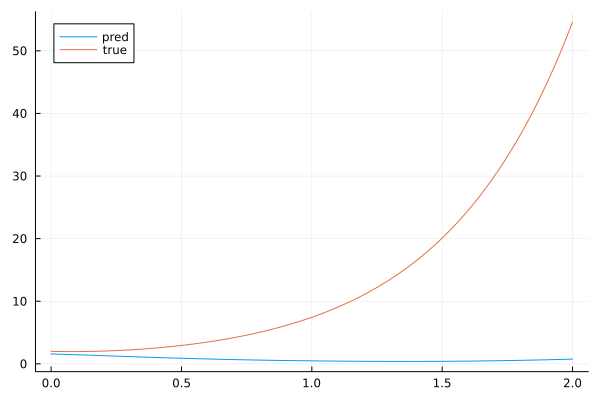

In [6]:
xs = reshape(range(0, 2, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. exp(2xs)+exp(-3xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")

## Train with tanh + BFGS

In [7]:
pinn = PINN(FullyConnected((1, 16, 16, 16, 16, 1), tanh))
prob = Sophon.discretize(ode, pinn, sampler, strategy)

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 352.82961718652416


Loss: 253.667027368971


Loss: 199.31718852093286
Loss: 51.30581701934081


Loss: 45.48732638266744
Loss: 38.91418091067364


Loss: 38.064319336167856
Loss: 37.19348740343686


Loss: 36.87264082258361
Loss: 36.02457574519249
Loss: 35.87491629552943


Loss: 35.69188219938039
Loss: 35.638215184607525
Loss: 35.60047330743581
Loss: 35.59284740229278


Loss: 35.57758120099359
Loss: 35.567320482783174


Loss: 35.555660897507735
Loss: 35.53506942223094


Loss: 35.52121175586689
Loss: 35.4930253482328


Loss: 35.48560368702868
Loss: 35.46114370042684


Loss: 35.443480656360286
Loss: 35.43854073962542
Loss: 35.40035747344635


Loss: 35.361418636955484
Loss: 35.33933689492996


Loss: 35.323173837137574
Loss: 35.3139261942276


Loss: 35.278175532899425


Loss: 35.20014047623635
Loss: 35.15302610016962


Loss: 35.07704323475029


Loss: 35.01192585478502


Loss: 34.95824657365167
Loss: 34.89169557120671


Loss: 34.81032530388625


Loss: 34.763551034144186
Loss: 34.75706493626465


Loss: 34.489106558050096


Loss: 34.4349724795442
Loss: 34.317373141215356


Loss: 34.230586490159226
Loss: 34.12466615957322


Loss: 34.06075802965756


Loss: 33.93338378812551


Loss: 33.864619310345724
Loss: 33.730141403563046


Loss: 33.62895197860624
Loss: 33.50308759078195


Loss: 33.36666391008945
Loss: 33.29573981767064


Loss: 33.155078923918985


Loss: 32.83401537233


Loss: 32.73398990777921
Loss: 32.59406027497674


Loss: 32.52573130035849
Loss: 32.48552704007579


Loss: 32.246595362366165


Loss: 31.596884857212938


Loss: 31.3208694663176


Loss: 30.655438214560565


Loss: 30.427553595776352
Loss: 30.36497187196184


Loss: 30.109598754909854


Loss: 30.014775964775193


Loss: 29.916929116570138


Loss: 29.856357741923738
Loss: 29.77405244575815


Loss: 29.686039112642305


Loss: 29.339731670677843


Loss: 28.99852217345609


Loss: 28.844107487020562


Loss: 28.785008374402004
Loss: 28.71871691409599


Loss: 28.6135174909705
Loss: 28.37313686942441


Loss: 28.127185162948706
Loss: 27.72067183351382


Loss: 27.410691821095536


Loss: 27.158325295557802


Loss: 26.863949735043416


Loss: 26.559795628952173


Loss: 26.285971491205462


Loss: 25.82594796945574
Loss: 25.594869228631726


Loss: 25.398708083241974


Loss: 25.213553931912802
Loss: 24.992216881905144


Loss: 24.788846260964434


Loss: 24.551475032373503


Loss: 24.21980141575859


Loss: 23.988452662301484


Loss: 23.700662740607676


Loss: 23.53998689622841


Loss: 23.262746319982362


Loss: 22.85264393614635
Loss: 22.648599283394002


Loss: 22.54276337121891


Loss: 22.13120586829099


Loss: 21.408925831627084


Loss: 21.127369379403255


Loss: 20.6872090389956
Loss: 20.532813021201516


Loss: 20.193704750645303


Loss: 19.744079875203052


Loss: 19.558325747363998


Loss: 19.17644521782676


Loss: 18.866374576570216


Loss: 18.39570873160837


Loss: 18.147075161765724


Loss: 17.94826590610163


Loss: 17.403488689424215


Loss: 16.832535565166847


Loss: 16.43183018038833


Loss: 16.015595422385392


Loss: 15.771841181725557


Loss: 15.46611732578652


Loss: 14.578981186751381


Loss: 14.391493562522426


Loss: 13.940967604345541


Loss: 13.401436310965186


Loss: 12.72907294844434


Loss: 12.612658585027898
Loss: 12.458691024987818


Loss: 12.39829823591783


Loss: 12.121055408229381


Loss: 11.899171046205568


Loss: 11.725390569280748


Loss: 11.056118606100982


Loss: 10.586478910477048


Loss: 10.356824890023402


Loss: 10.251628351077287


Loss: 9.572909278882959


Loss: 9.129595623294227


Loss: 9.065961415704933


Loss: 8.517189937545773


Loss: 8.419033315942293
Loss: 8.37252401289015


Loss: 8.179825055929998


Loss: 7.902089525567978


Loss: 7.713442040271901


Loss: 7.188829306128582


Loss: 6.718136586557648


Loss: 6.329350173998759


Loss: 6.021833038480816


Loss: 5.541627595466912


Loss: 5.4235915908628956


Loss: 5.247625761515581


Loss: 5.163272816427091


Loss: 4.8370695858787425


Loss: 4.488704071650027


Loss: 3.9984904577960707


Loss: 3.8423484934152006


Loss: 3.5058472300460997
Loss: 3.318552280744249


Loss: 3.2674332621181823
Loss: 3.2254617843640063


Loss: 3.1099516425682823


Loss: 2.8598334850505136
Loss: 2.7912519479370026


Loss: 2.550848921857663


Loss: 2.244048298261978
Loss: 2.133243361078534


Loss: 2.0035618906341215
Loss: 1.9577457184808438


Loss: 1.8584011509433498
Loss: 1.7667512472481528


Loss: 1.713299009745014
Loss: 1.6298127841253607


Loss: 1.476349309319335


Loss: 1.2769939896906546
Loss: 1.181210627803239


Loss: 1.0249404468927226
Loss: 0.9689687825311062


Loss: 0.8958865448227228


Loss: 0.81597910363443


Loss: 0.75421130828765
Loss: 0.6768710819718279


Loss: 0.5743870665133717
Loss: 0.533467434764557


Loss: 0.49186945339823945


Loss: 0.39915117274592776
Loss: 0.374738508999725


Loss: 0.3332590051282858
Loss: 0.2946516891867301


Loss: 0.2599533026524191
Loss: 0.25040505679462427


Loss: 0.22192318008258874


Loss: 0.17928593459231046
Loss: 0.15276294202781965


Loss: 0.11946425972972408
Loss: 0.10328914891640495
Loss: 0.09591786885064015


Loss: 0.06657561293034822
Loss: 0.04445477973205528


Loss: 0.03653793300836284
Loss: 0.027032405058182895


Loss: 0.02385728083030095
Loss: 0.02181714819564949
Loss: 0.020209084709357714


Loss: 0.016669659007250436
Loss: 0.014946018100571192
Loss: 0.01374674996985789


Loss: 0.012739372407864248
Loss: 0.012533970987810804
Loss: 0.009805693694647438
Loss: 0.009013919433016767


Loss: 0.0072757944526846184
Loss: 0.006391038848364672
Loss: 0.005772720856012202


Loss: 0.004836939094661739
Loss: 0.004517108409471012
Loss: 0.0038155479910464835
Loss: 0.0034896787598249226


Loss: 0.0030660735623598604
Loss: 0.0029031111575912485
Loss: 0.002685571062763062


Loss: 0.002231693211809344
Loss: 0.0020591187316347697
Loss: 0.001913026471710581
Loss: 0.0018121131917060744


Loss: 0.0016376515638933072
Loss: 0.001555227906278396
Loss: 0.001453586939061178


Loss: 0.001332845142891236
Loss: 0.0012428250395681612
Loss: 0.0011607126603520748


Loss: 0.0010403639529753153
Loss: 0.0009279777956800612


Loss: 0.0008743173051982007
Loss: 0.0007416813902625454


Loss: 0.0006660897698087147
Loss: 0.0006038120757645474
Loss: 0.0005686758230606685


Loss: 0.000499003575785437
Loss: 0.0003827678439709284


Loss: 0.00030221985334413966
Loss: 0.0002531381884720347
Loss: 0.00019776798374605413


Loss: 0.00018320122761810183
Loss: 0.00014334374718192683
Loss: 0.00012943876799322558


Loss: 0.00011734583220506413
Loss: 0.00011172824349257117
Loss: 0.00010218652405790544
Loss: 9.667017123959268e-5


Loss: 9.297633151701328e-5
Loss: 8.826286344285795e-5
Loss: 8.224144440092779e-5


Loss: 7.437883034437887e-5
Loss: 6.162985010717571e-5
Loss: 5.091532970028061e-5


Loss: 4.8350502594302645e-5
Loss: 4.348780332921903e-5
Loss: 3.933407602313794e-5


Loss: 3.769260715180093e-5
Loss: 3.6514690165336505e-5
Loss: 3.59826806638893e-5


Loss: 3.581119579356773e-5
Loss: 3.5678149730967553e-5
Loss: 3.5630128326084306e-5


Loss: 3.550357192399559e-5
Loss: 3.525212287382189e-5


Loss: 3.3977549689455266e-5
Loss: 3.32791050972358e-5


Loss: 3.2185678787731946e-5
Loss: 3.05874110081923e-5
Loss: 2.9662020636282174e-5


Loss: 2.7572798023031692e-5
Loss: 2.659483937443704e-5
Loss: 2.52752475686545e-5
Loss: 2.4288144877985187e-5


Loss: 2.343886370723084e-5
Loss: 2.3066958122424914e-5
Loss: 2.2766285770106e-5


Loss: 2.249023976696737e-5
Loss: 2.193232086048537e-5
Loss: 2.1457824900628132e-5


Loss: 2.1014229796305722e-5
Loss: 2.0811377151175597e-5
Loss: 2.051509725300236e-5


Loss: 2.0093028451903477e-5
Loss: 1.9660593960521007e-5
Loss: 1.9245590348281242e-5


Loss: 1.8906406020519792e-5
Loss: 1.8502367382821484e-5


Loss: 1.8076500664444508e-5
Loss: 1.7793112925675972e-5
Loss: 1.7508520412743077e-5


Loss: 1.7412304038536655e-5
Loss: 1.737461828036848e-5
Loss: 1.732978999189437e-5


Loss: 1.728550174241551e-5
Loss: 1.70516445358714e-5


Loss: 1.659000706960519e-5
Loss: 1.590933682965667e-5


Loss: 1.5040646229878908e-5
Loss: 1.4746573179500025e-5
Loss: 1.3600214259853752e-5


Loss: 1.2645218682466551e-5
Loss: 1.1616477403129116e-5
Loss: 1.1066419141703108e-5


Loss: 1.0539802910138055e-5
Loss: 1.0450534154236759e-5
Loss: 9.846464144650535e-6


Loss: 9.342051777819975e-6
Loss: 8.844122852786562e-6
Loss: 8.282662409616945e-6


Loss: 7.885122549007554e-6
Loss: 7.489833563230778e-6
Loss: 6.770047791209853e-6
Loss: 6.54796352781666e-6


Loss: 6.315319149324775e-6
Loss: 6.112375955569189e-6
Loss: 5.962309463330804e-6


Loss: 5.752583531726825e-6
Loss: 5.6447613596272515e-6
Loss: 5.5168336206568095e-6
Loss: 5.42889581880834e-6


Loss: 5.3636506814965435e-6
Loss: 5.30123943520822e-6
Loss: 5.247055024003847e-6


Loss: 5.227128470782192e-6
Loss: 5.219097312010439e-6
Loss: 5.2033461710436515e-6


Loss: 5.190596891297011e-6
Loss: 5.186184964405456e-6
Loss: 5.185526008545985e-6


Loss: 5.181006551286956e-6
Loss: 5.177832697100824e-6
Loss: 5.1728902166726764e-6


Loss: 5.171571466752775e-6
Loss: 5.168606447764544e-6


Loss: 5.1614083277158916e-6
Loss: 5.113607051221483e-6


Loss: 5.043565002533639e-6
Loss: 4.919775889549436e-6
Loss: 4.779972547015724e-6


Loss: 4.753552599129972e-6
Loss: 4.670876508348787e-6
Loss: 4.617011756207699e-6


Loss: 4.453457488737337e-6
Loss: 4.391236988806187e-6
Loss: 4.290519101601516e-6


Loss: 4.271088688729329e-6
Loss: 4.23613712049457e-6
Loss: 4.208542325229651e-6
Loss: 4.161571276945178e-6


Loss: 4.101347557218008e-6
Loss: 4.0524671577388295e-6
Loss: 3.995319625345187e-6


Loss: 3.9071182529631425e-6
Loss: 3.855871502113489e-6
Loss: 3.7886066389045822e-6


Loss: 3.7525254957680348e-6
Loss: 3.724794801536194e-6
Loss: 3.6906123219342146e-6


Loss: 3.6711336610284462e-6
Loss: 3.659302581079244e-6
Loss: 3.6562139263165427e-6


Loss: 3.6300384322787467e-6
Loss: 3.575099301628355e-6
Loss: 3.4709087177144577e-6


Loss: 3.430668614663787e-6
Loss: 3.3219458671077506e-6
Loss: 3.283912952865979e-6
Loss: 3.24585835685006e-6


Loss: 3.213581991778018e-6
Loss: 3.189522495269697e-6
Loss: 3.171217107353244e-6


Loss: 3.148159434061314e-6
Loss: 3.128334622654173e-6
Loss: 3.105993832189878e-6


Loss: 3.0800262975602176e-6
Loss: 3.0582137108122163e-6
Loss: 3.0380278277174943e-6


Loss: 3.0127078444137443e-6
Loss: 2.992865779514595e-6
Loss: 2.9752136952530733e-6
Loss: 2.956192105381072e-6


Loss: 2.9451718900684353e-6
Loss: 2.929870365184477e-6


Loss: 2.908702054019879e-6
Loss: 2.903342825269169e-6


Loss: 2.8844586778610496e-6
Loss: 2.8670633216158373e-6
Loss: 2.8468125646797196e-6


Loss: 2.8356581608828104e-6
Loss: 2.805841455486813e-6
Loss: 2.7840177918018427e-6


Loss: 2.7635548023038763e-6
Loss: 2.751436540116614e-6
Loss: 2.74804747964327e-6
Loss: 2.733892301776987e-6


Loss: 2.7263335284919323e-6
Loss: 2.7242094628124654e-6
Loss: 2.7235809862486045e-6


Loss: 2.718193808769481e-6
Loss: 2.714725475458366e-6
Loss: 2.7088976859099933e-6


Loss: 2.7088797578366637e-6
Loss: 2.7079055792226337e-6
Loss: 2.7041707113866215e-6


Loss: 2.6994694705706153e-6
Loss: 2.6956695512950454e-6
Loss: 2.6945452021915727e-6


Loss: 2.694476129198454e-6
Loss: 2.6919893114041432e-6


Loss: 2.690189591194381e-6


Loss: 2.689686728236146e-6
Loss: 2.688135461520727e-6


Loss: 2.6881308549783256e-6


Loss: 2.688077863883268e-6


Loss: 2.6880567815702687e-6


Loss: 2.6880175771367887e-6


Loss: 2.6879167476750696e-6


Loss: 2.6879104575464128e-6


Loss: 2.6879104575464128e-6


Loss: 2.6879104575464128e-6


u: ComponentVector{Float64}(layer_1 = (weight = [-0.05798526437294699; 0.6353602974260246; … ; -0.5152176358919242; -4.326707369899907;;], bias = [1.3802631390815714; 3.857909514751938; … ; 1.2072189837571092; 10.326368102557232;;]), layer_2 = (weight = [-0.29796603053326803 1.428082987256034 … -0.2452353955032299 -0.45114420363490537; 2.5402703685788417 -0.11509846626958903 … -1.084758529819544 -2.2162603904893725; … ; 1.0734294167720828 0.7453274093811406 … -0.20407585903475242 1.3181181419616166; -0.9068994245195169 2.1750053895668886 … 2.9163036122284667 -4.295405076857272], bias = [-1.431208884223131; 1.4323535455980176; … ; 0.24678087008283892; 0.5805458322279752;;]), layer_3 = (weight = [0.9652779731973667 0.21355214965722494 … -0.44282041428691005 0.5274887046270454; -2.040628354739509 1.3808389428487942 … 0.8558325234564215 1.5254042822200442; … ; -0.1834341260683268 -0.686475104234179 … 0.5008196477085756 -1.8661883157862922; 1.2626335776440654 0.9866409880109959 … 0.50923480

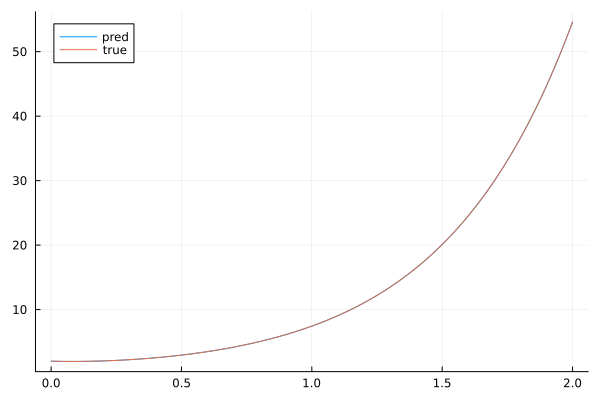

In [8]:
xs = reshape(range(0, 2, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. exp(2xs)+exp(-3xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")